In [1]:
import os 
import copy 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import seaborn as sns

from matplotlib.animation import FuncAnimation
# %matplotlib qt
%matplotlib inline

In [2]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFdensity')

true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)
data_waiting = df[df != 108.0]
    
kernel_type = 'gaussian_poly2'
bw_list = [7.0] #  [5.0, 7.0, 9.0]
log_pen_param_list = [-12.0] #  [-12.0, -10.0, -8.0]
contam_weight = 1e-8

bw=7.0, pen=-12.0


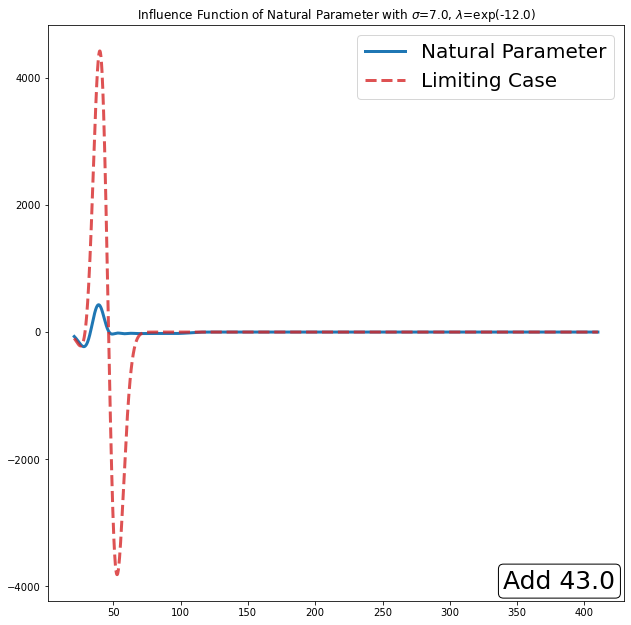

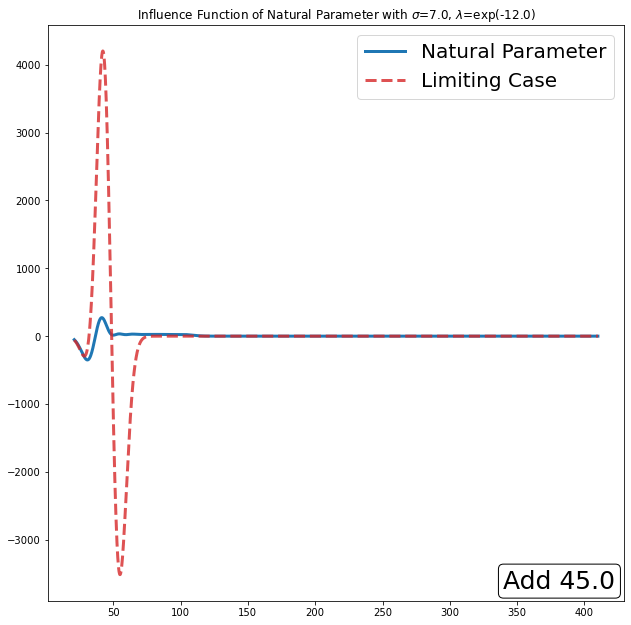

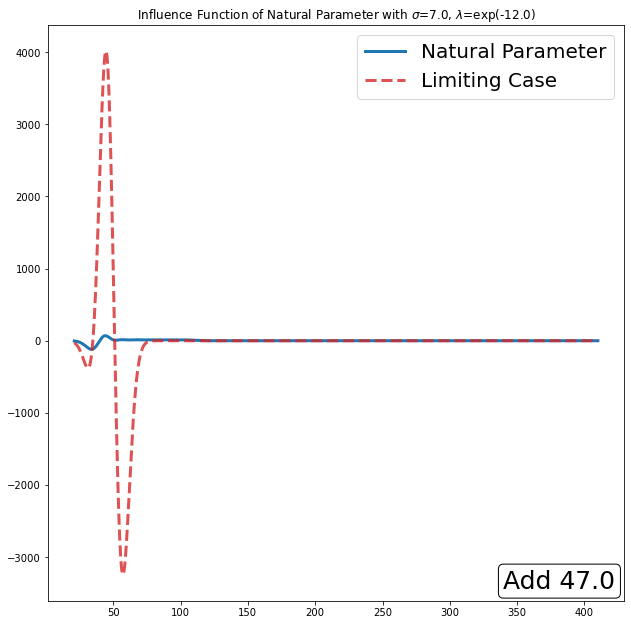

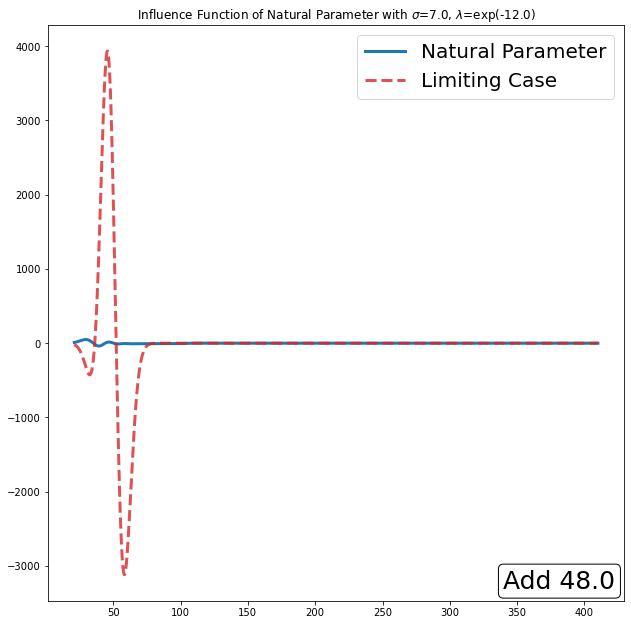

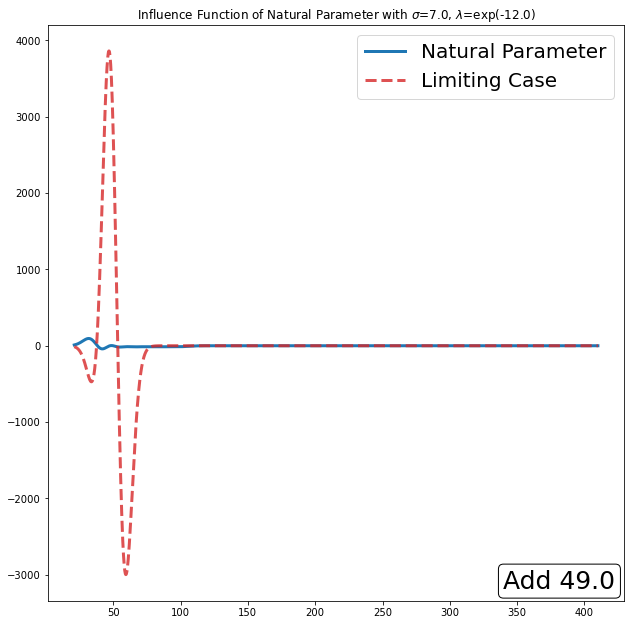

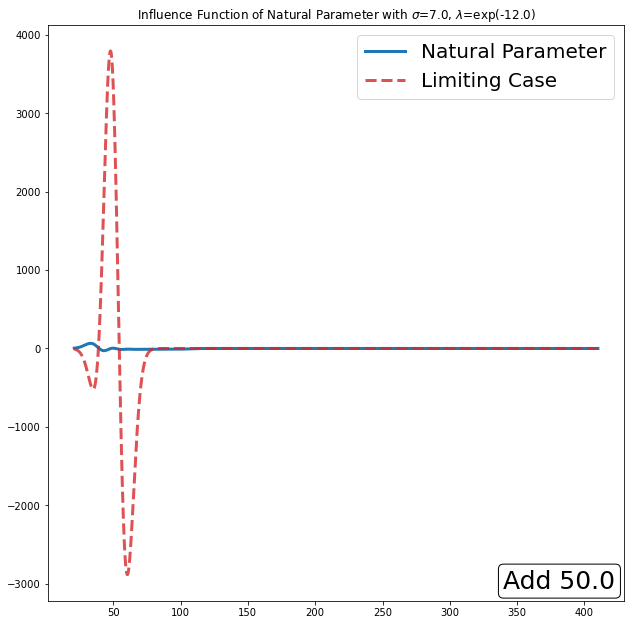

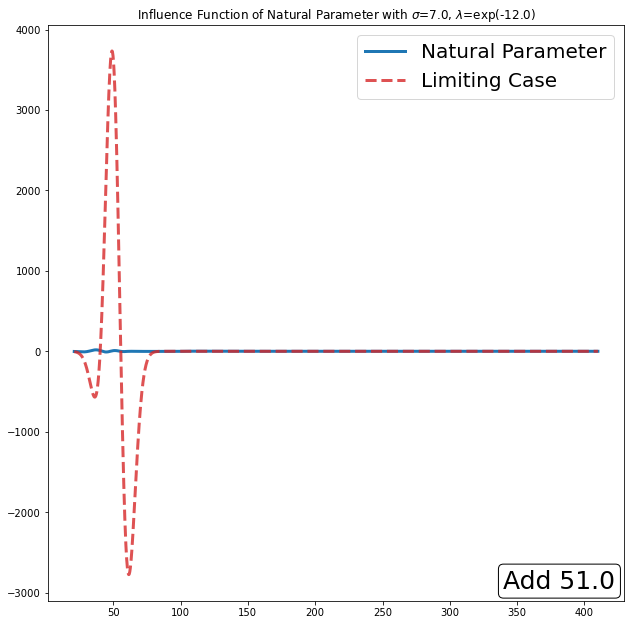

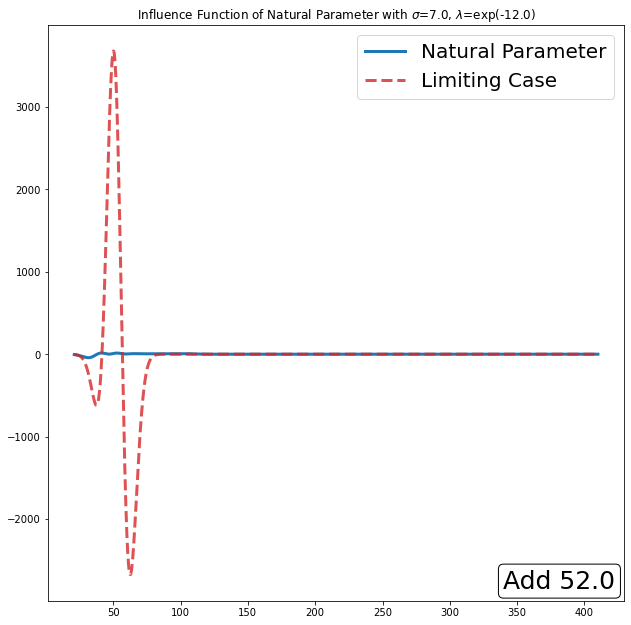

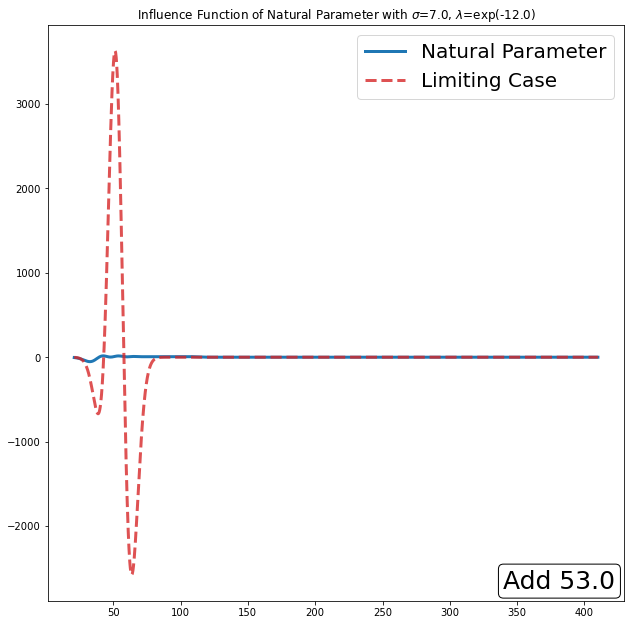

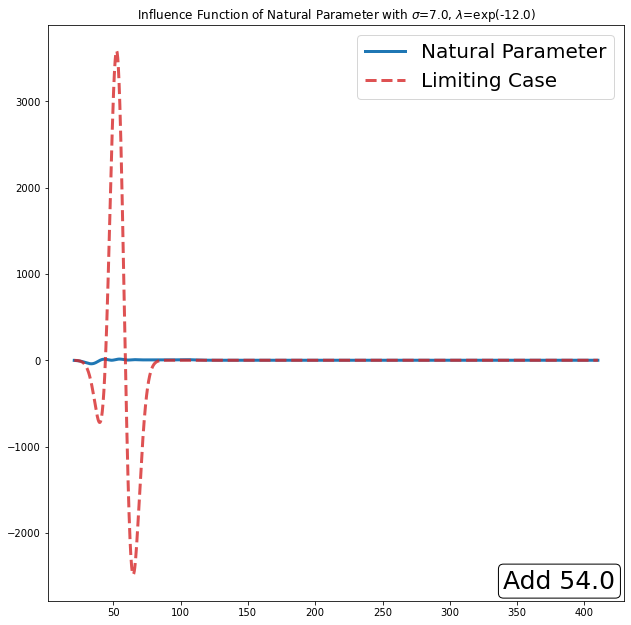

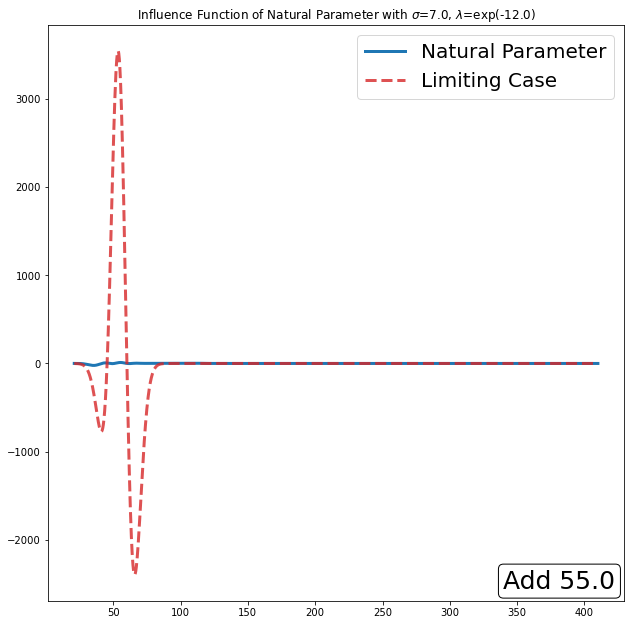

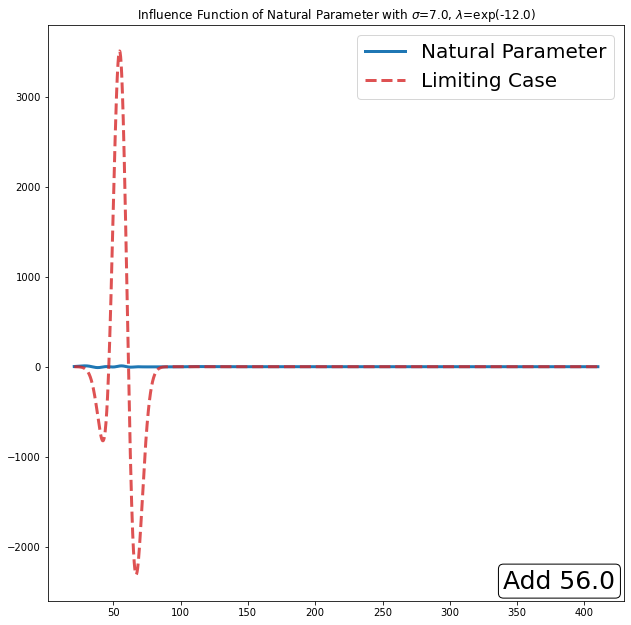

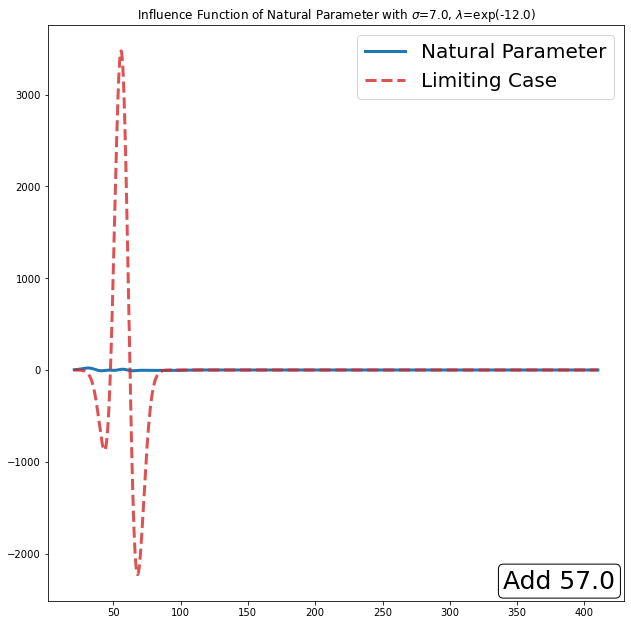

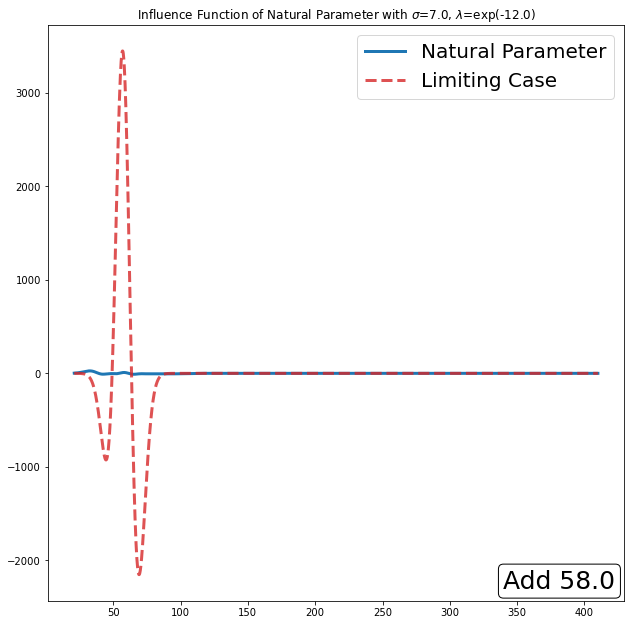

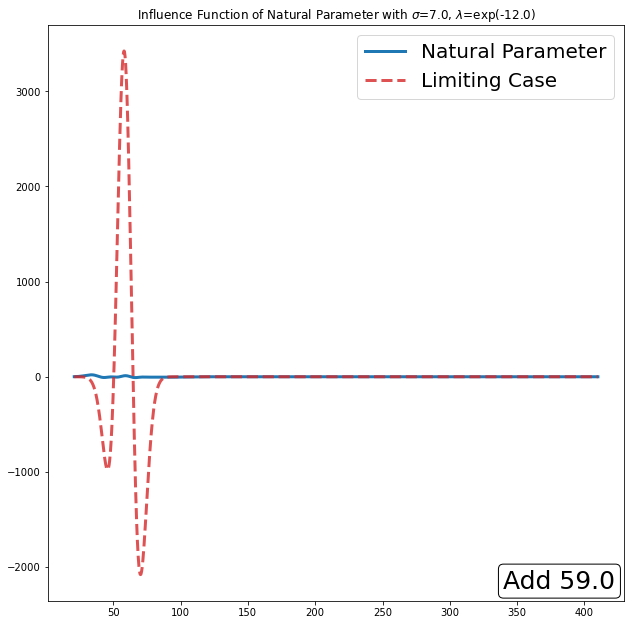

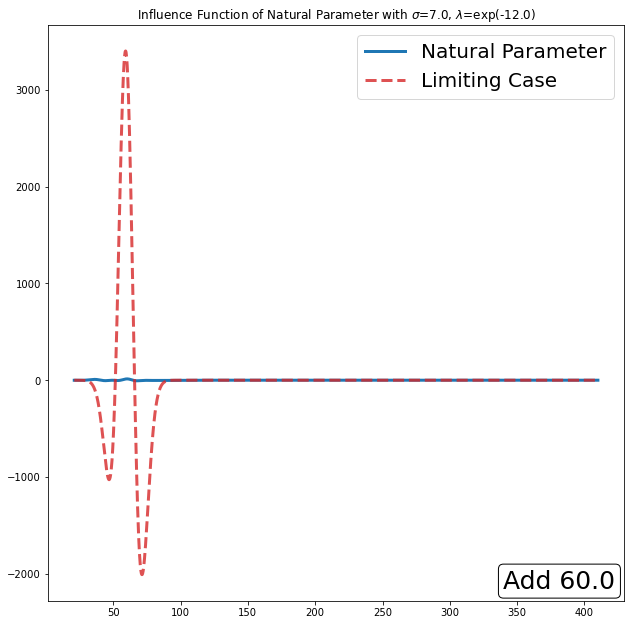

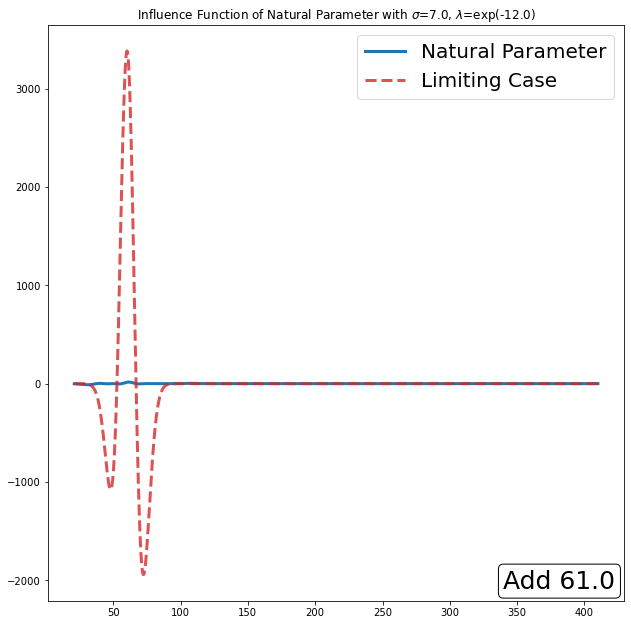

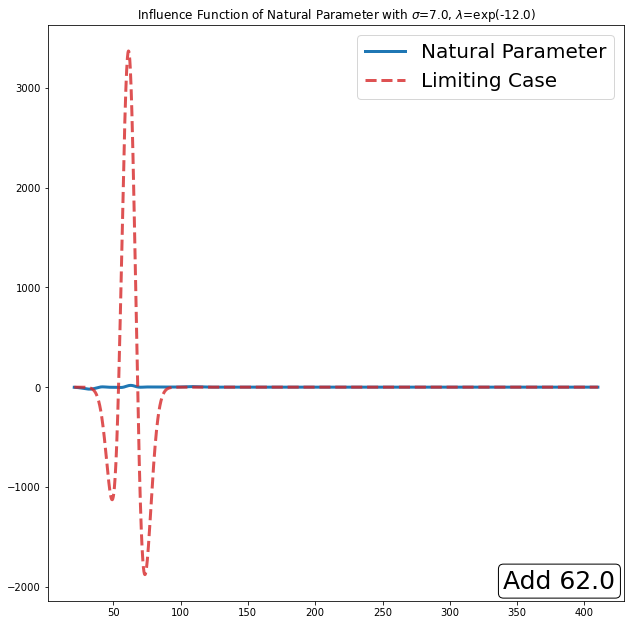

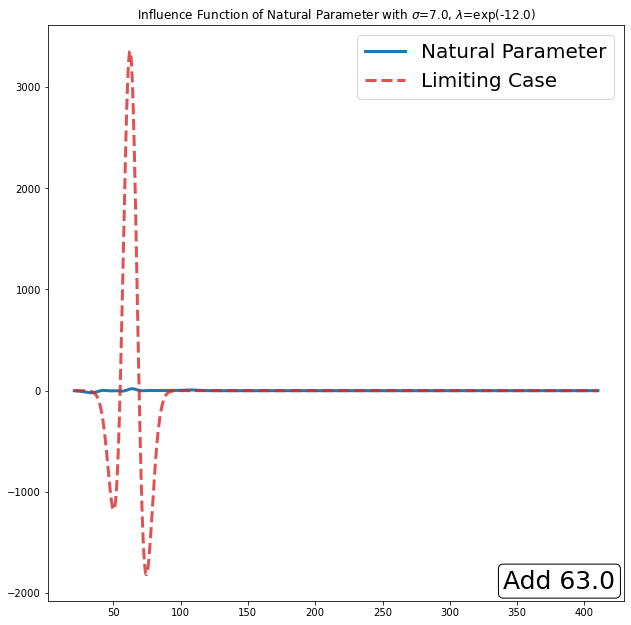

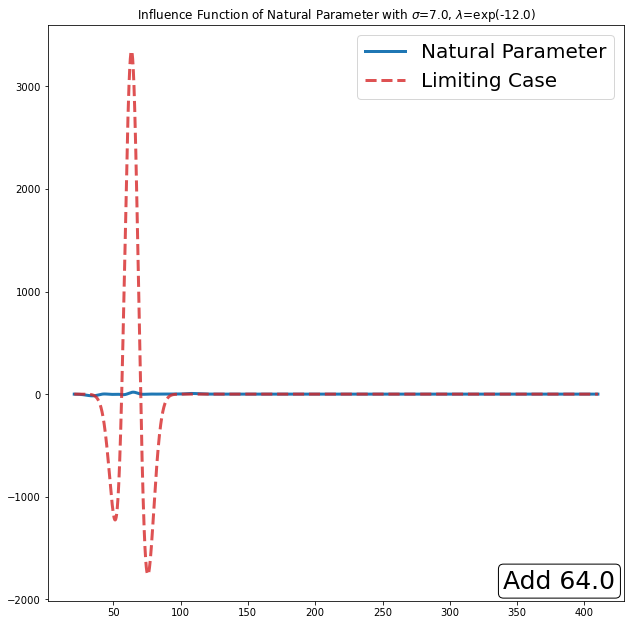

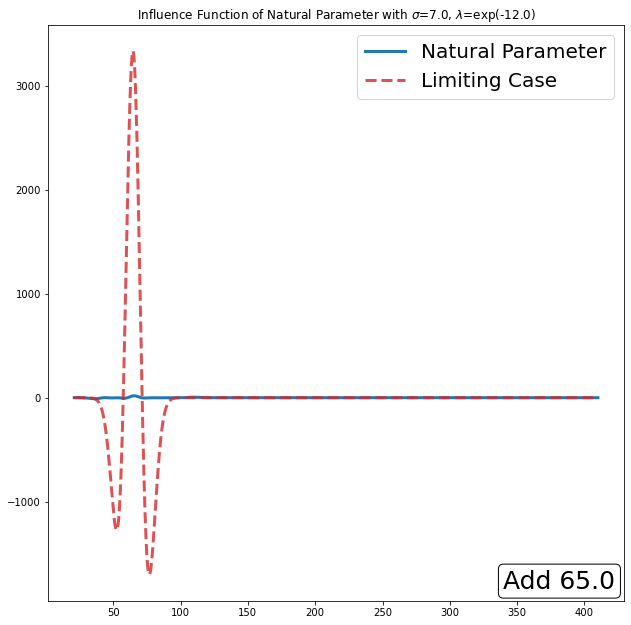

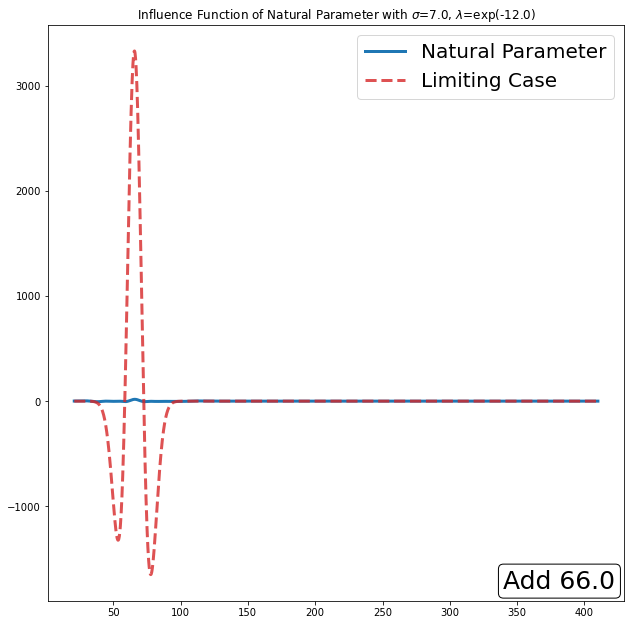

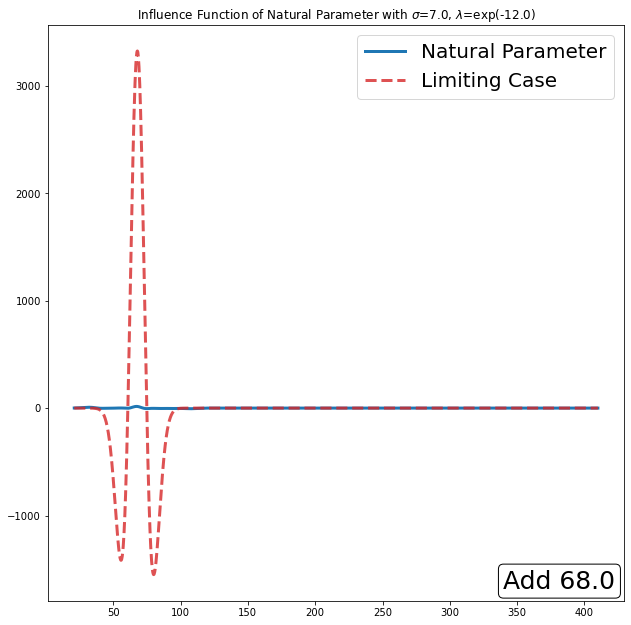

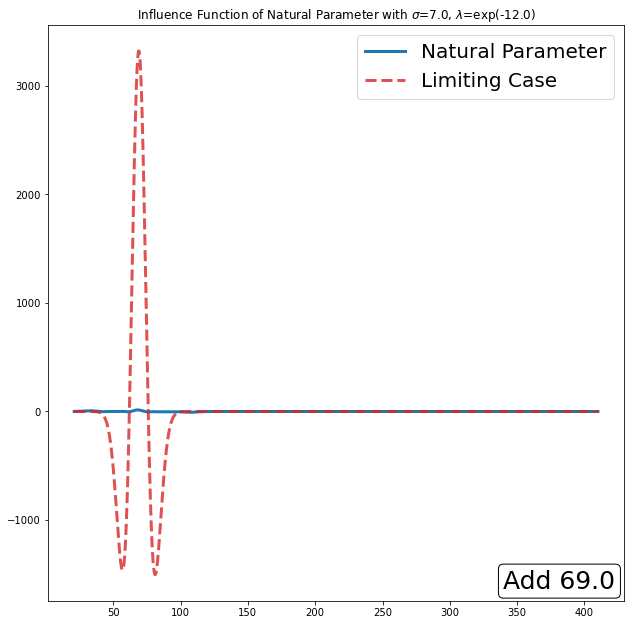

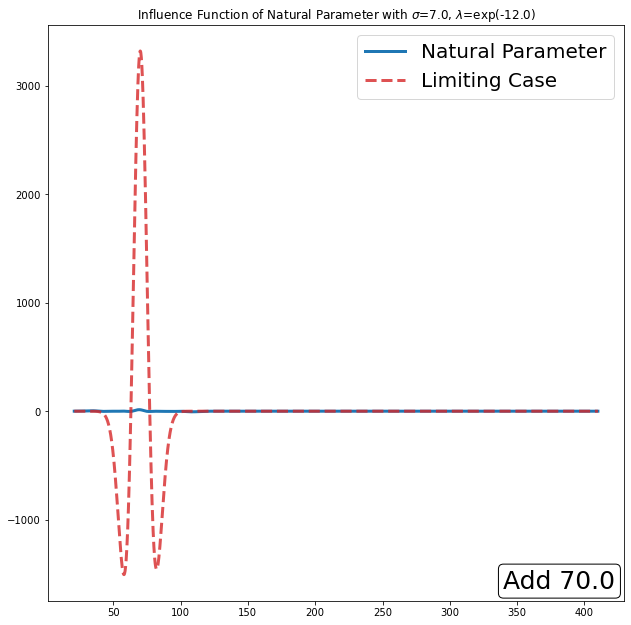

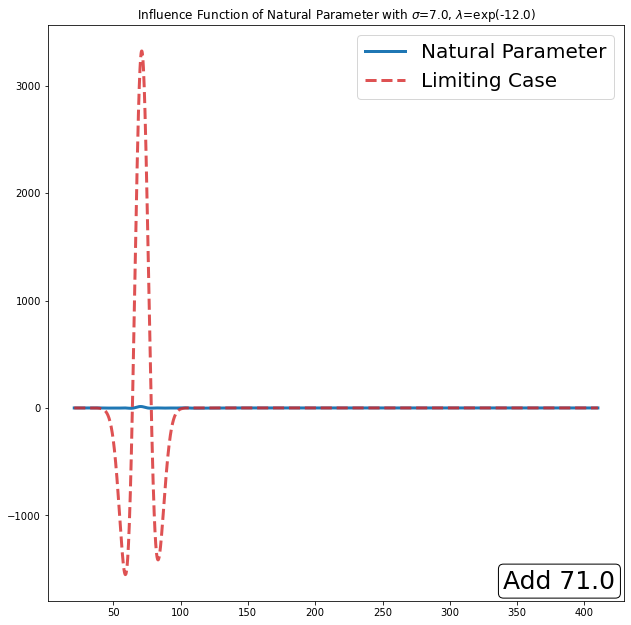

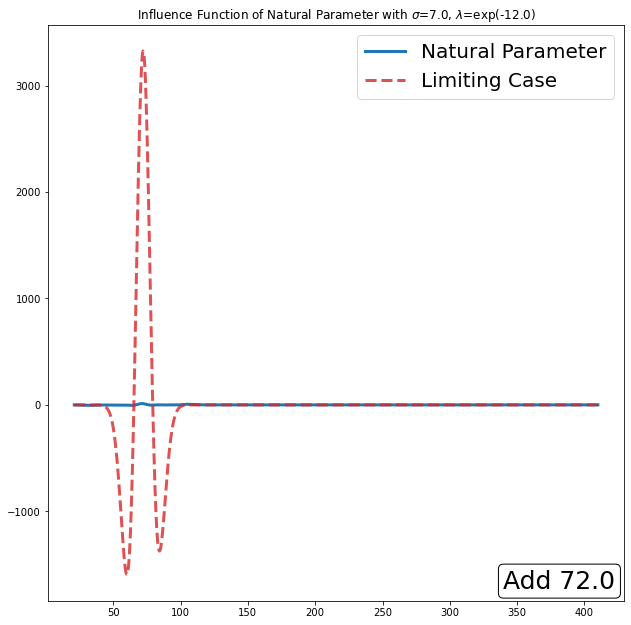

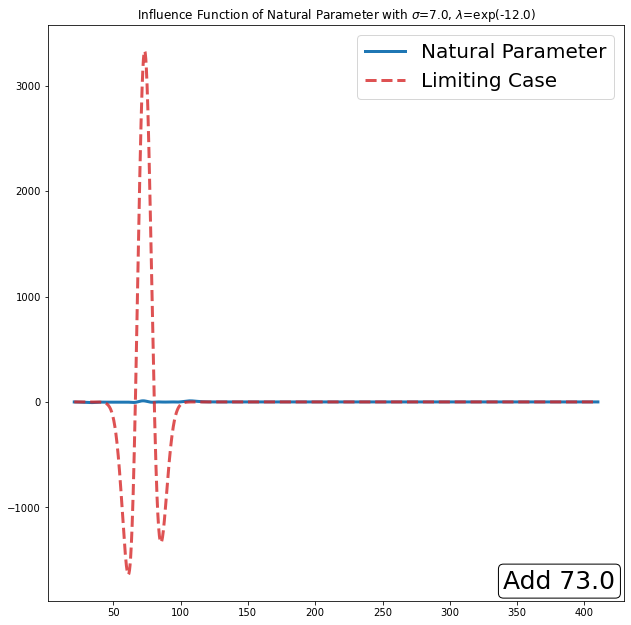

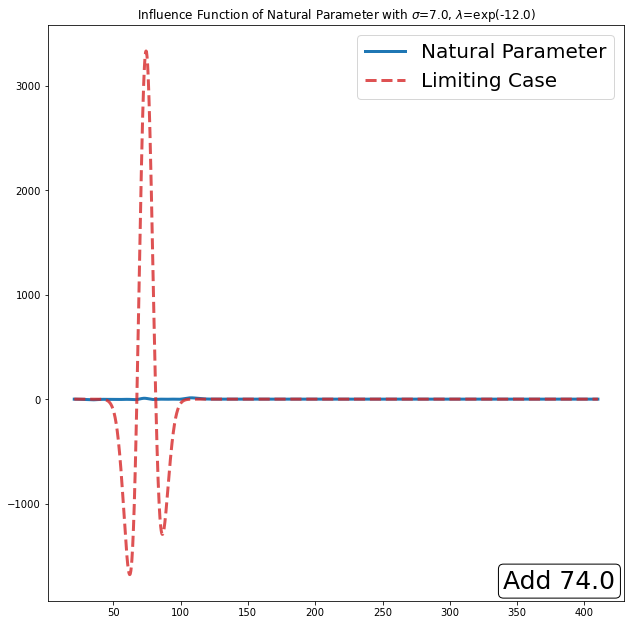

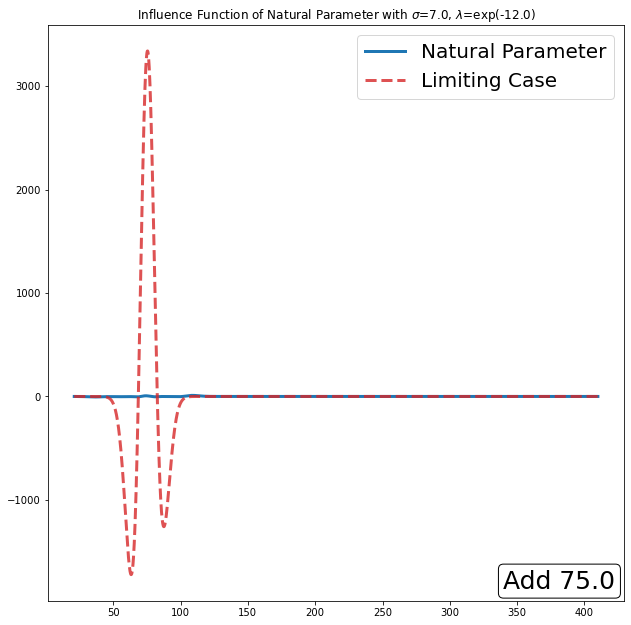

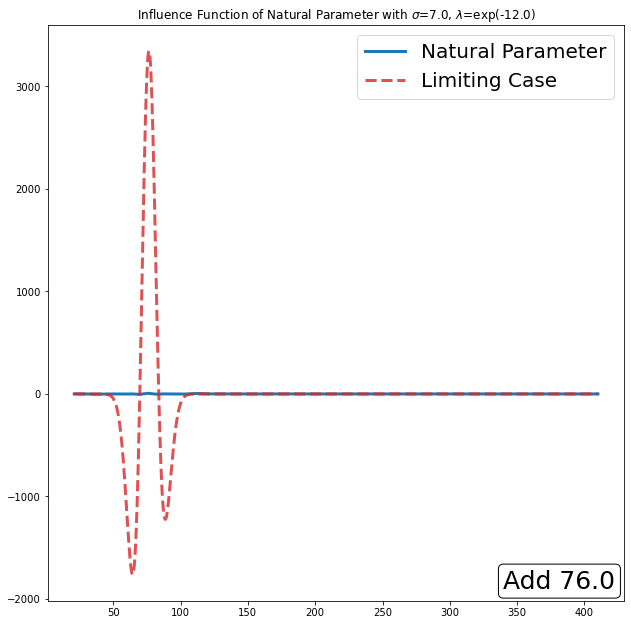

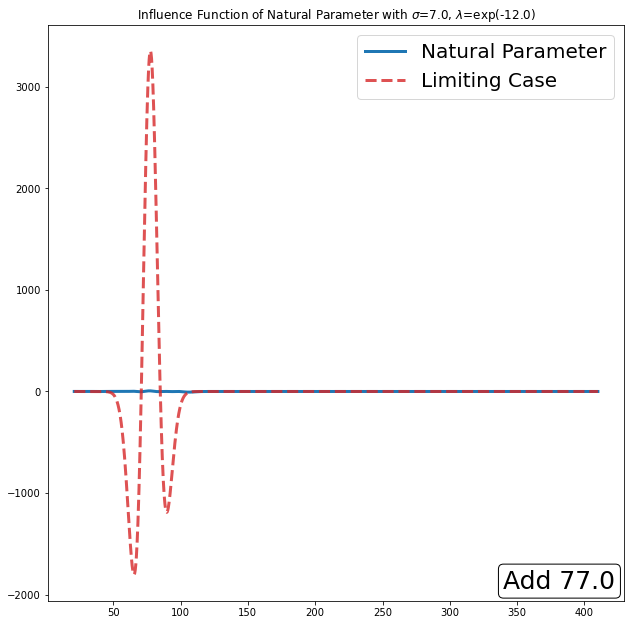

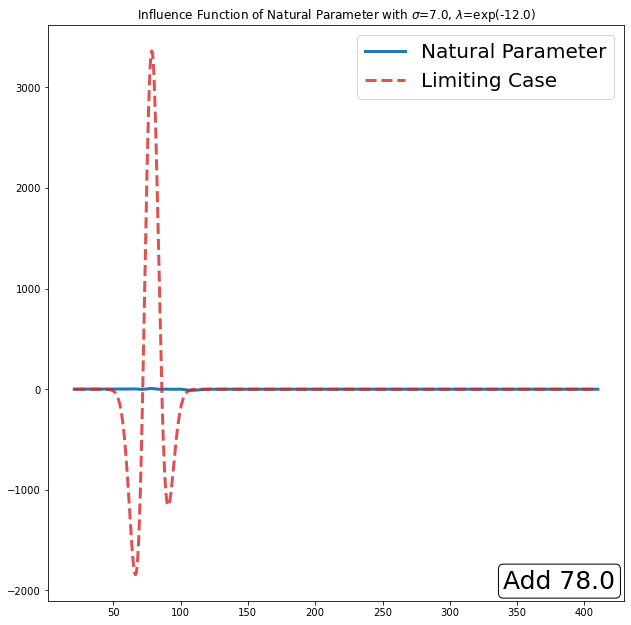

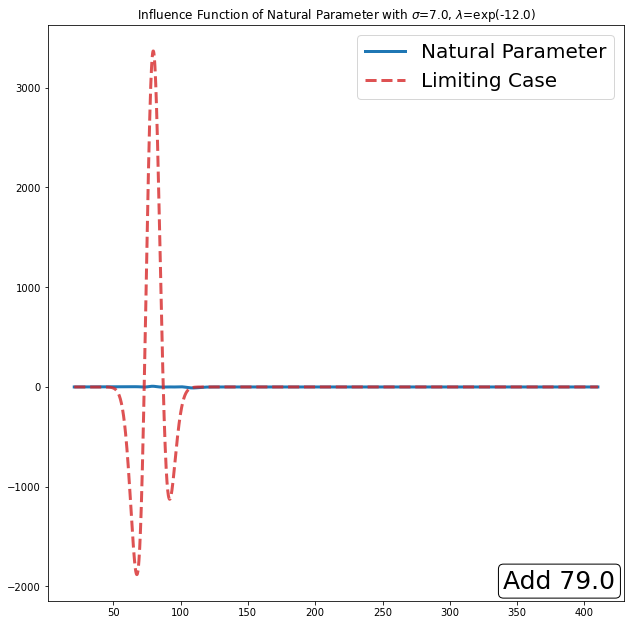

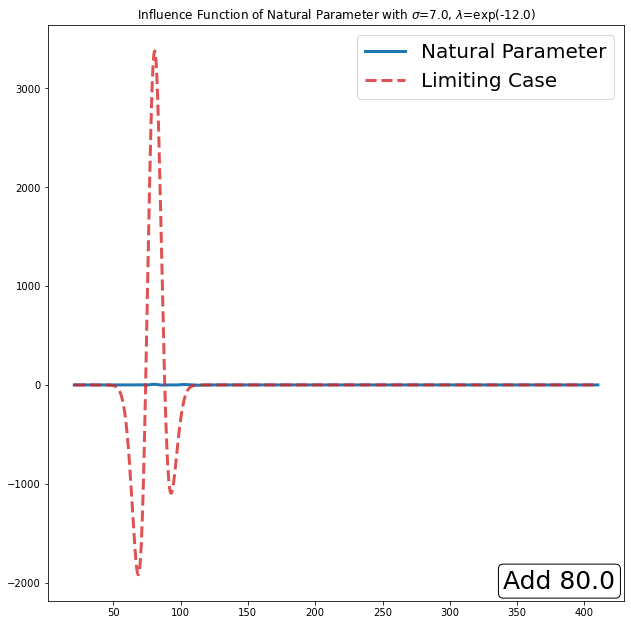

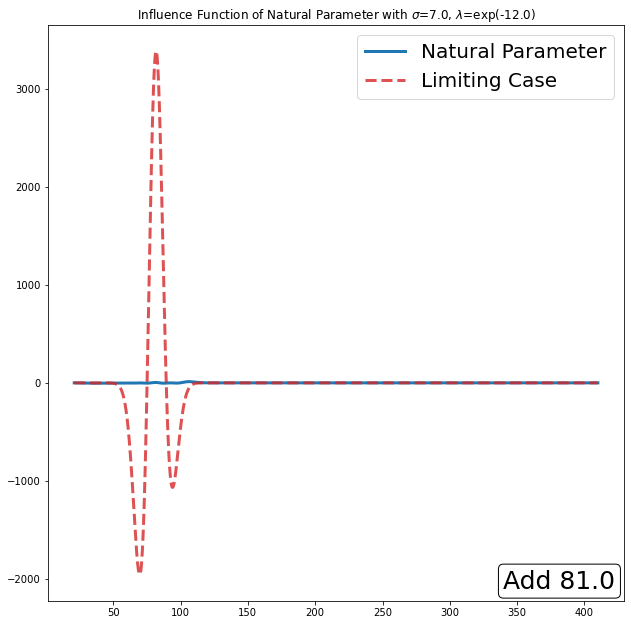

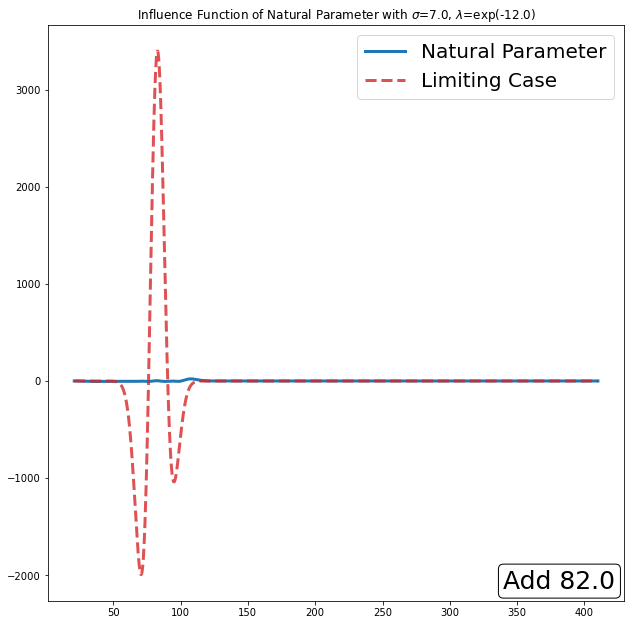

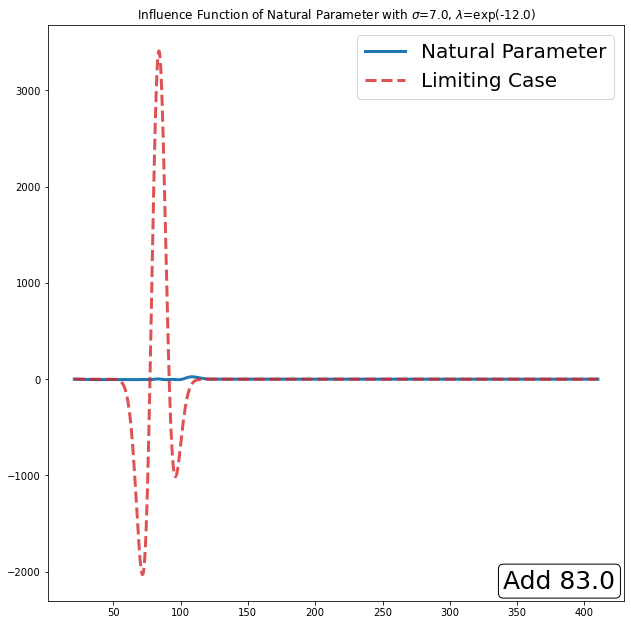

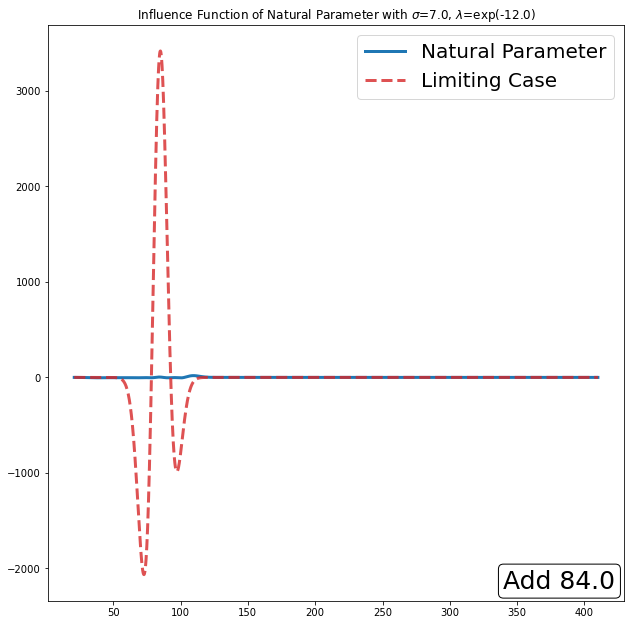

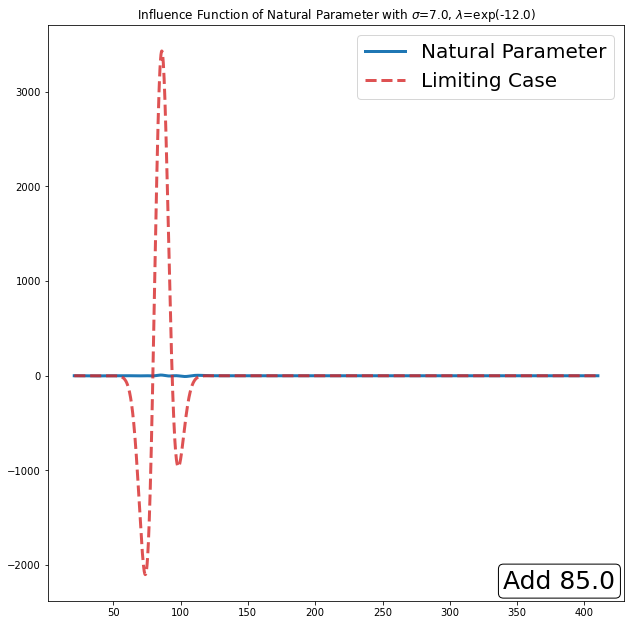

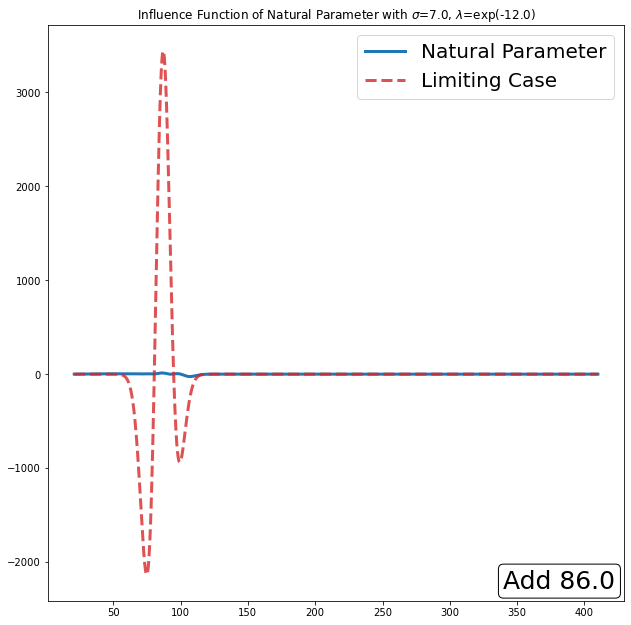

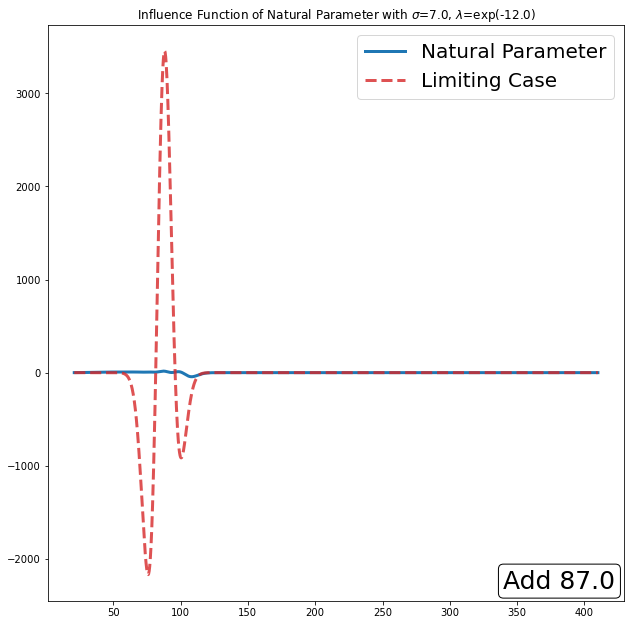

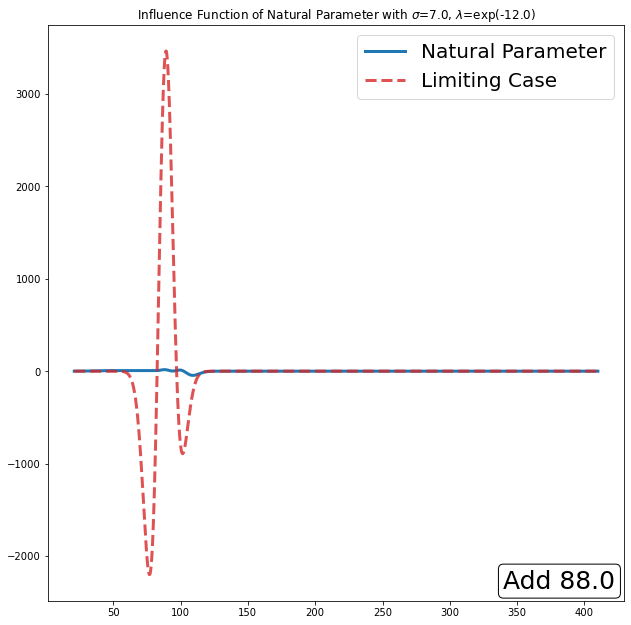

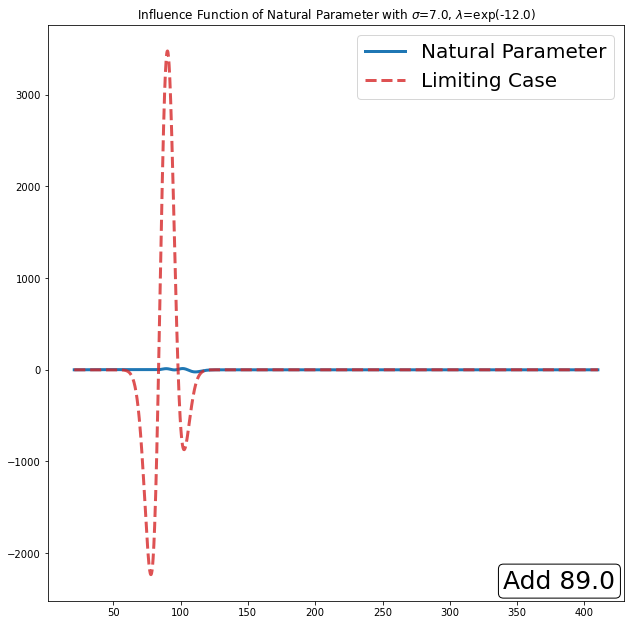

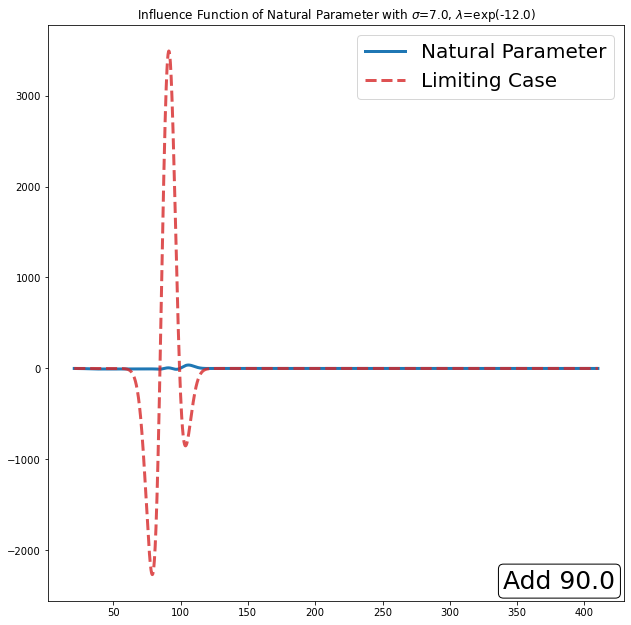

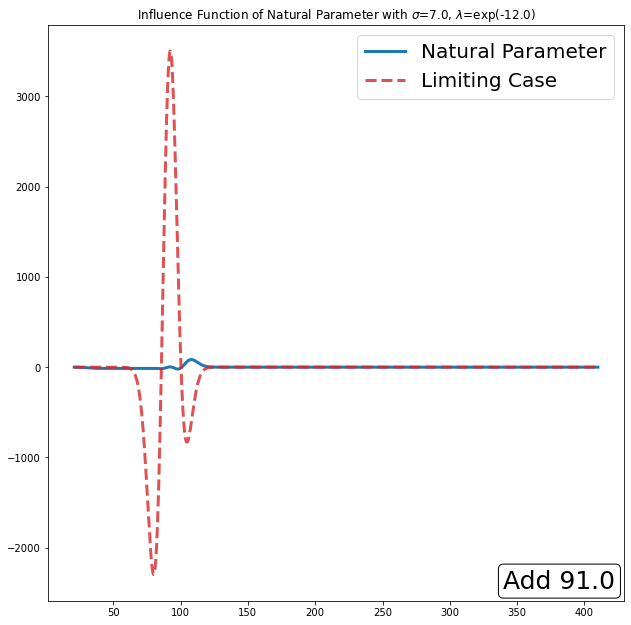

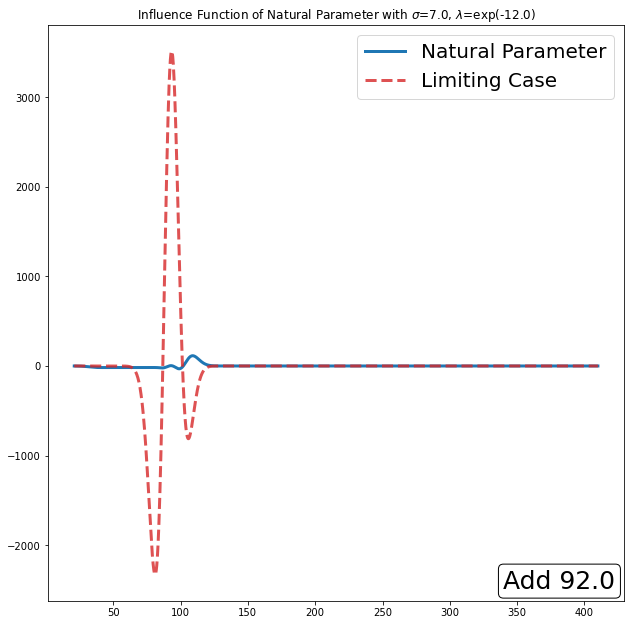

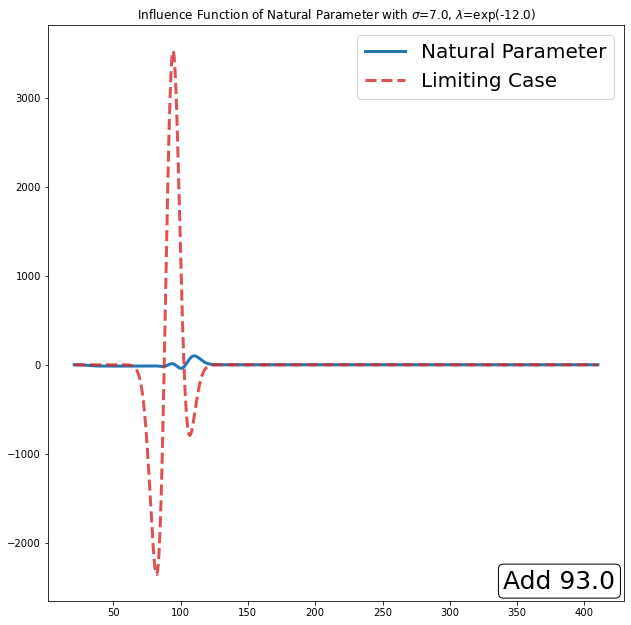

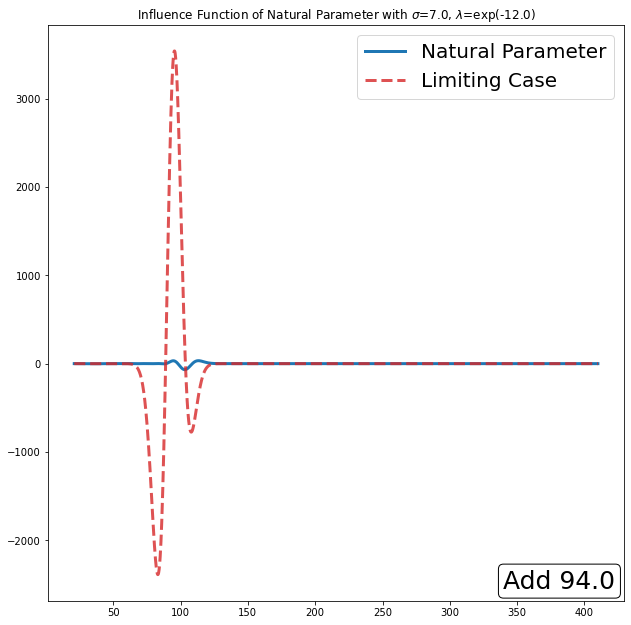

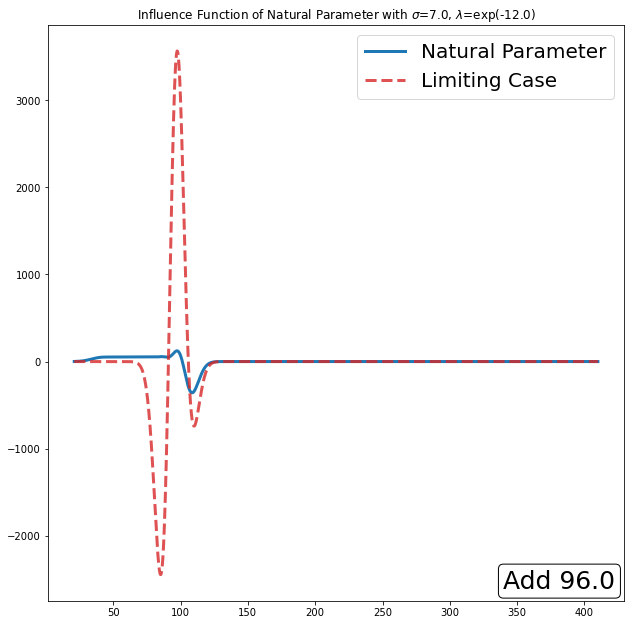

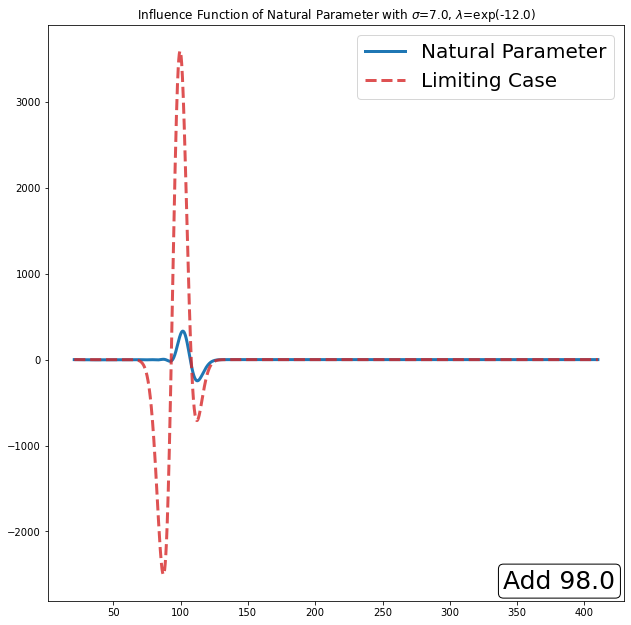

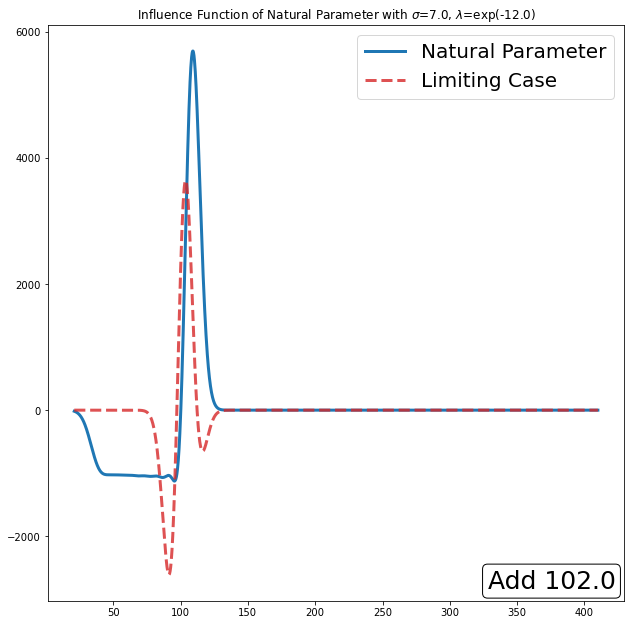

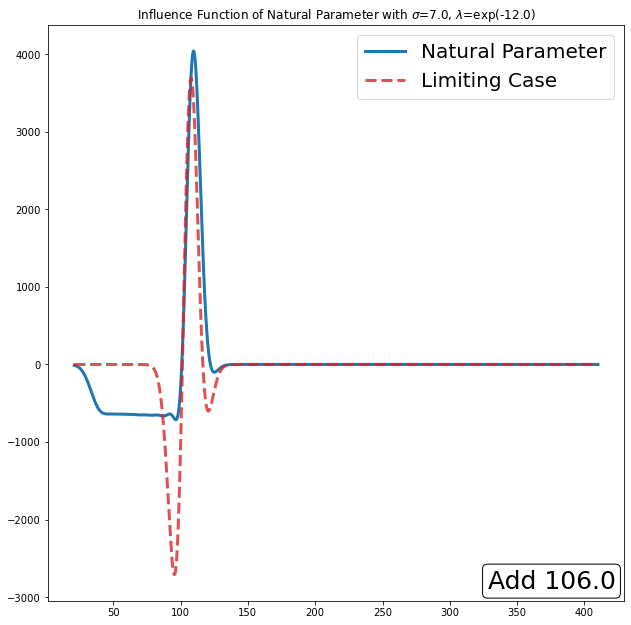

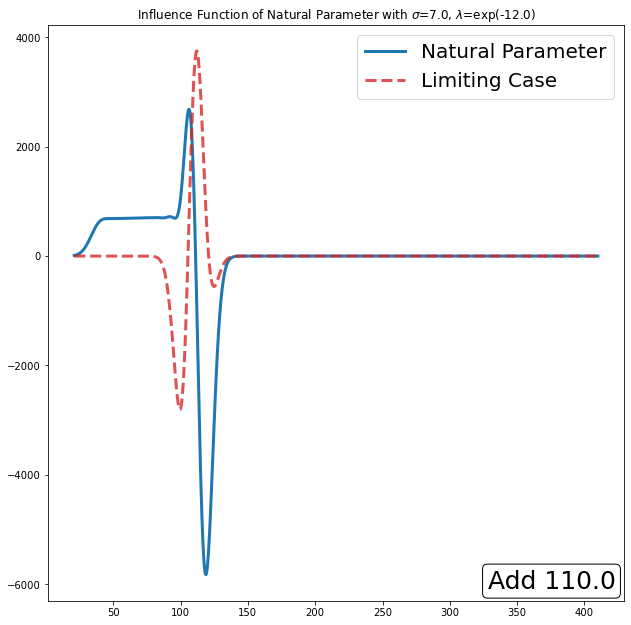

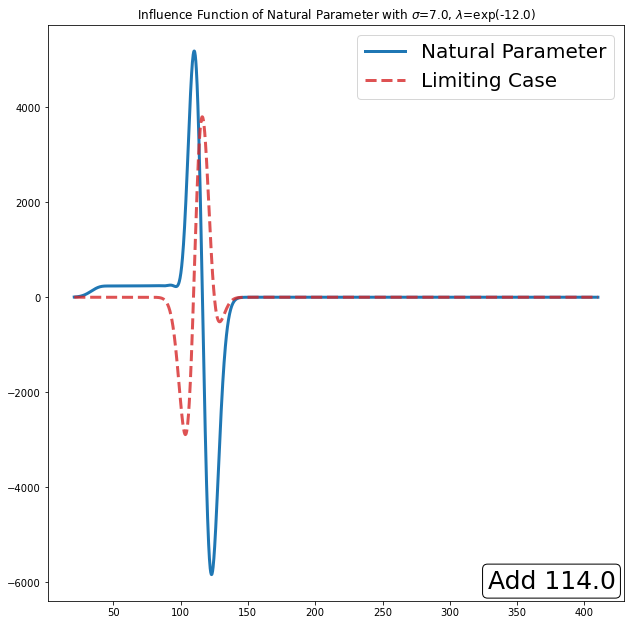

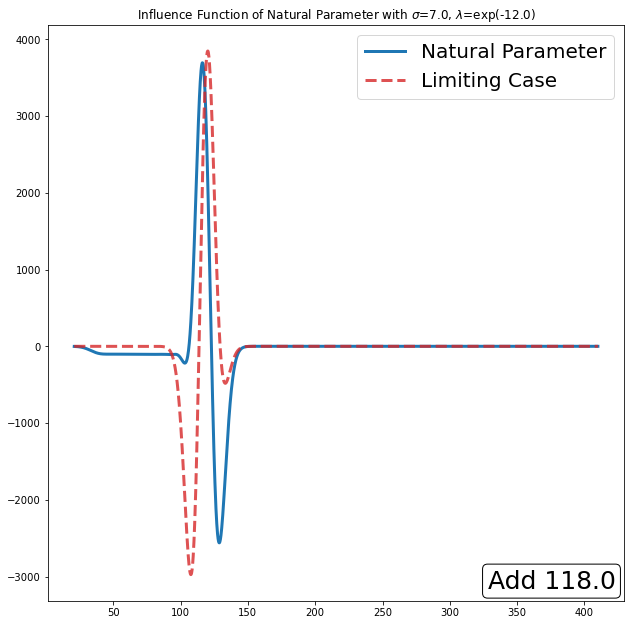

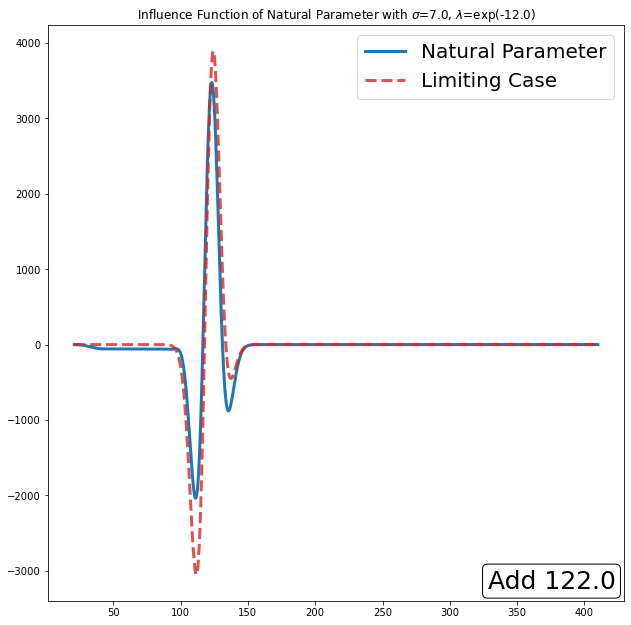

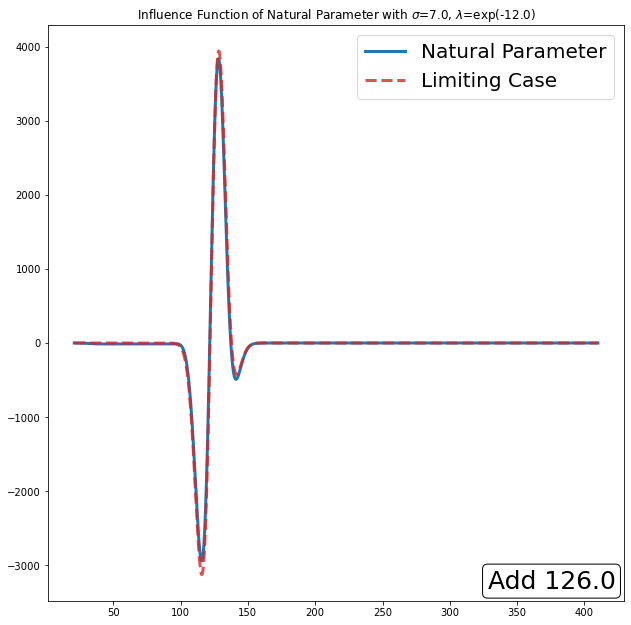

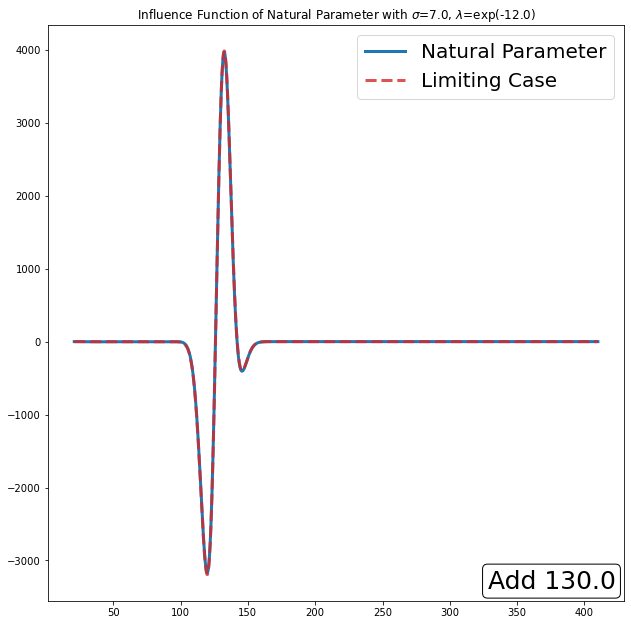

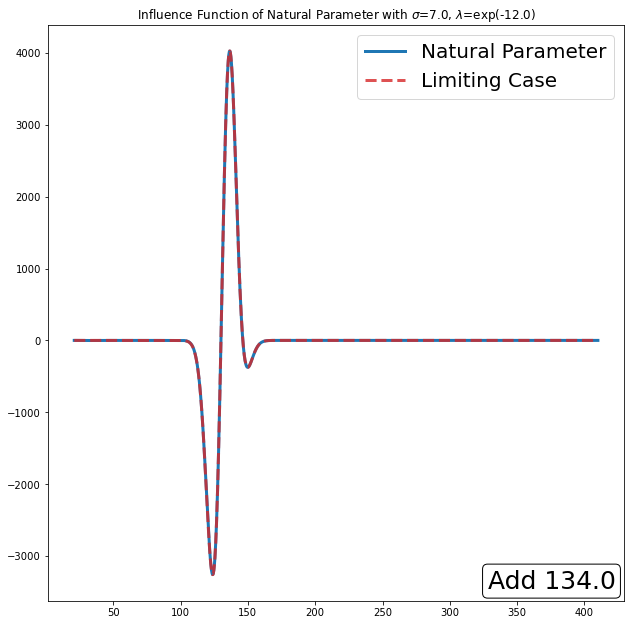

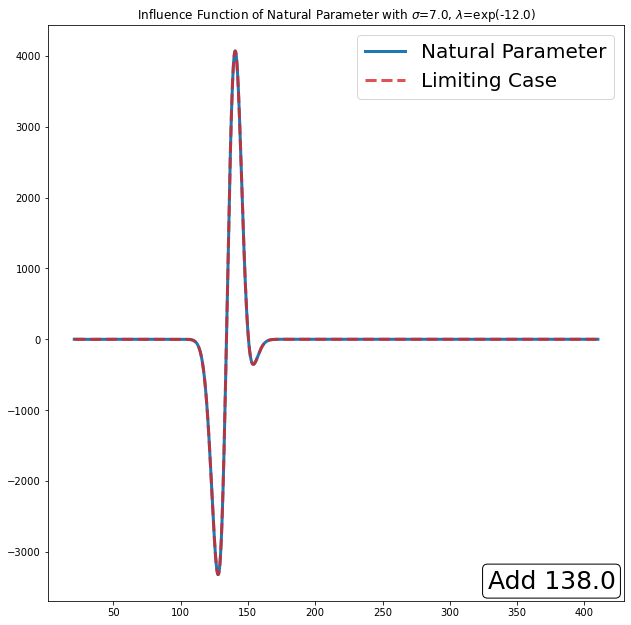

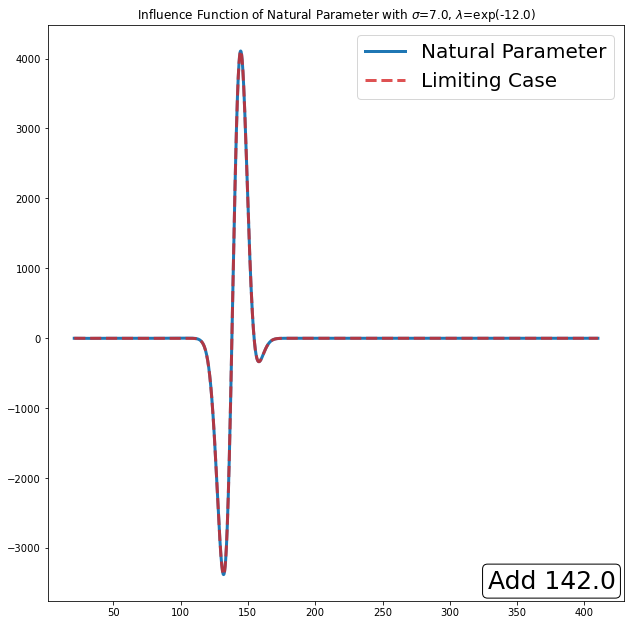

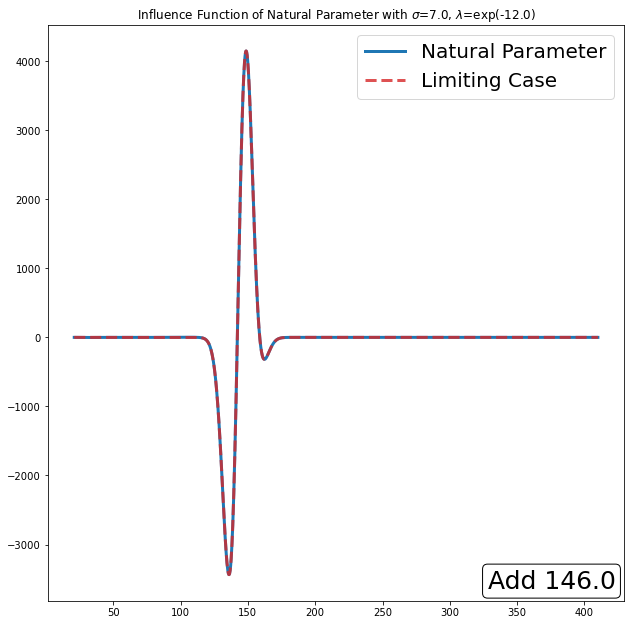

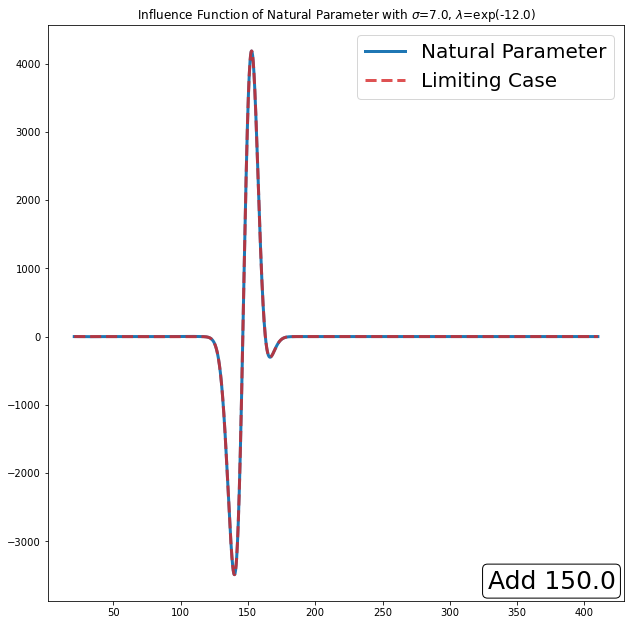

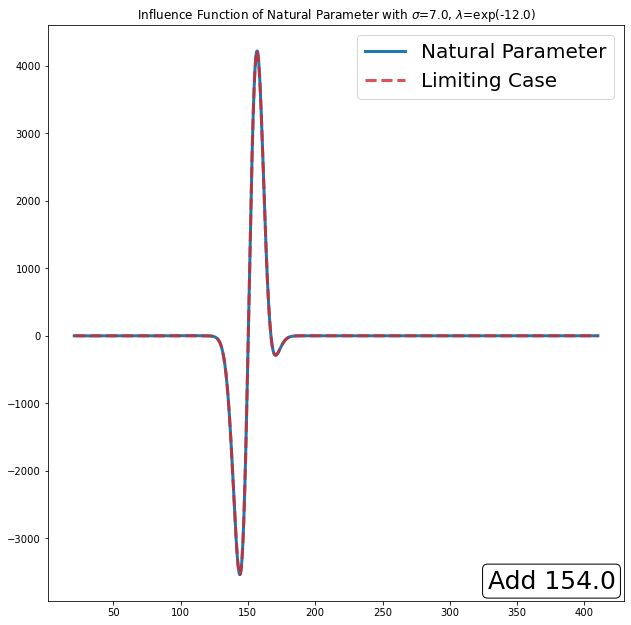

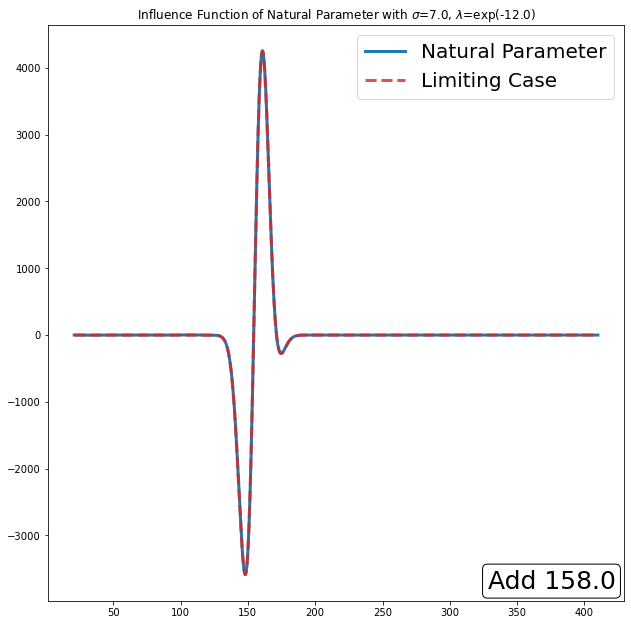

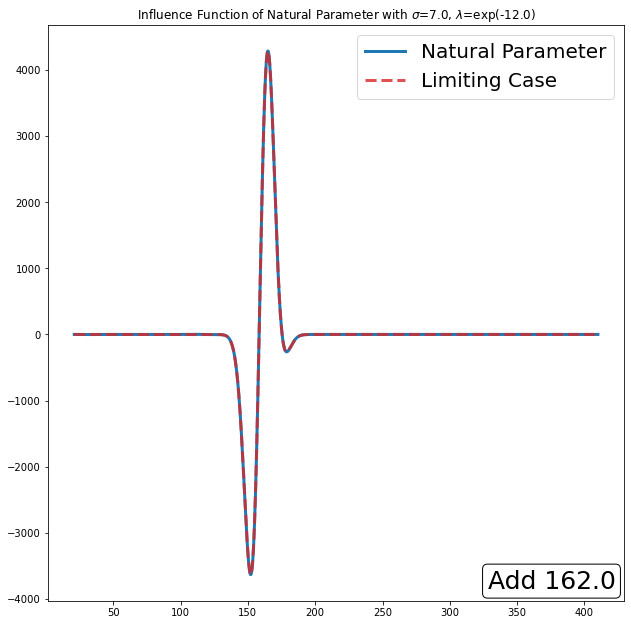

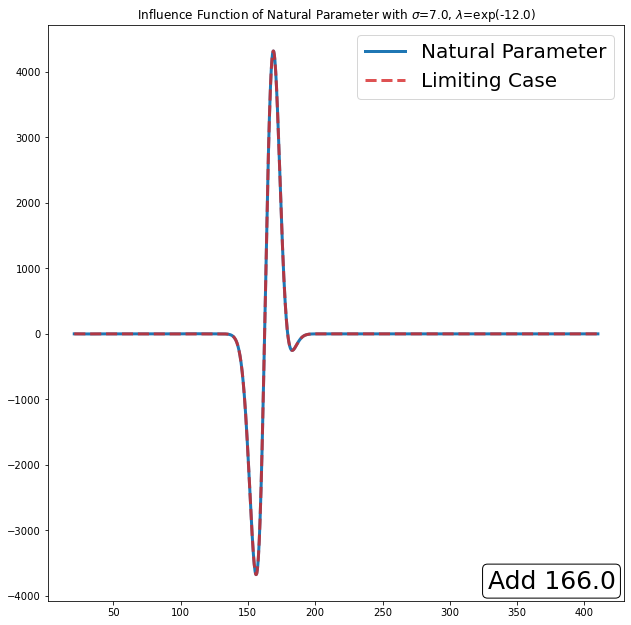

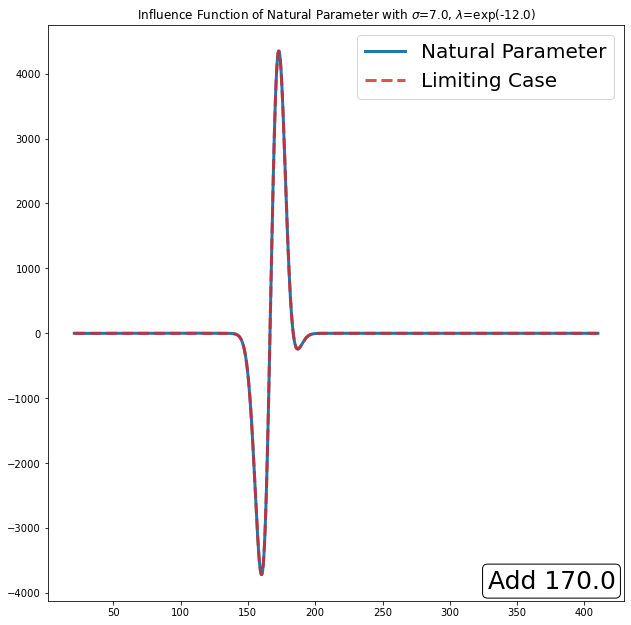

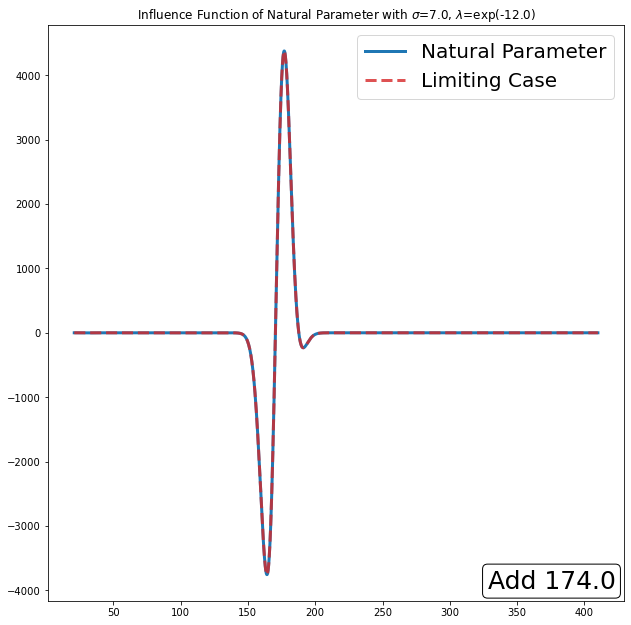

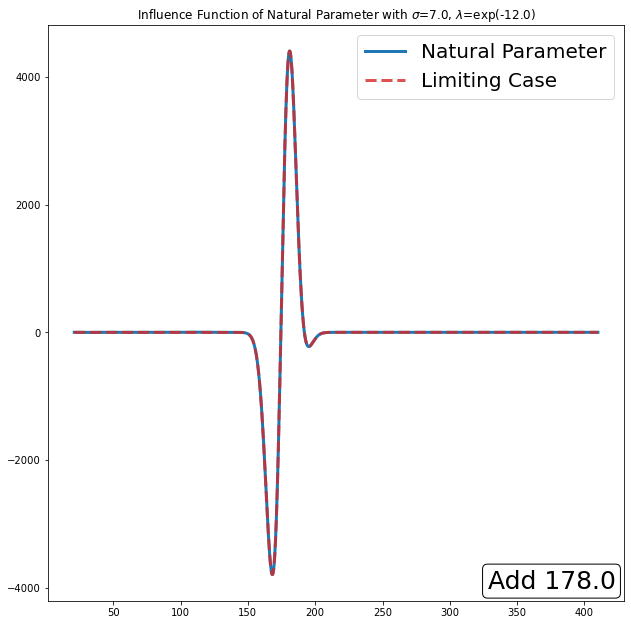

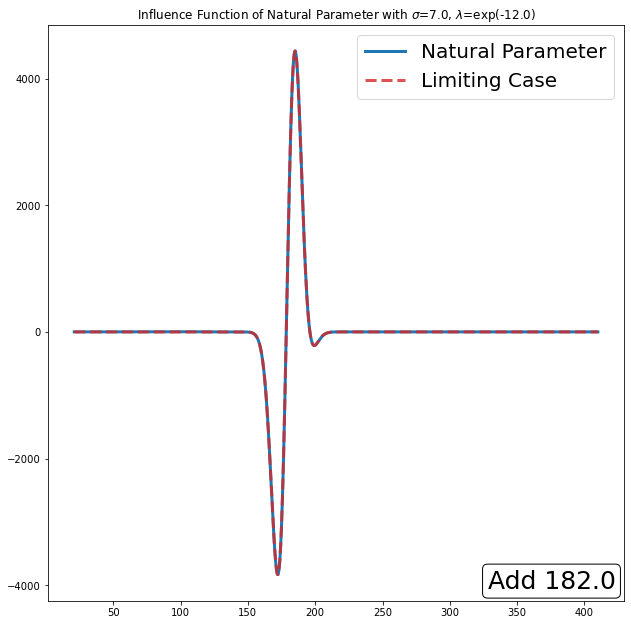

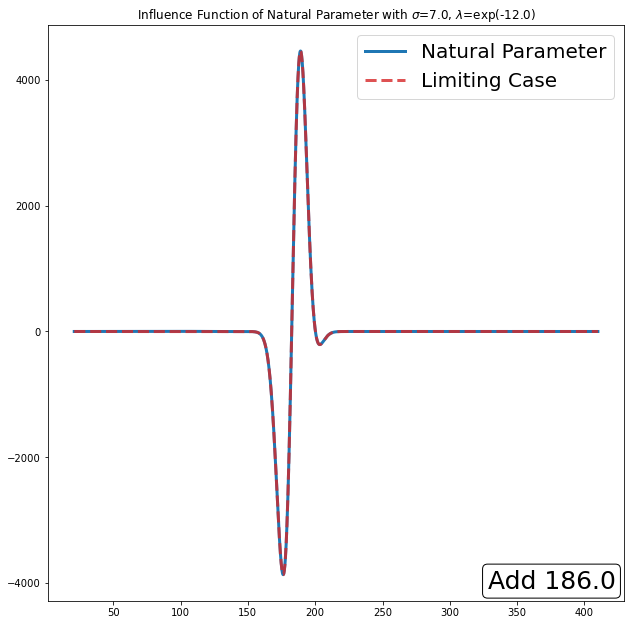

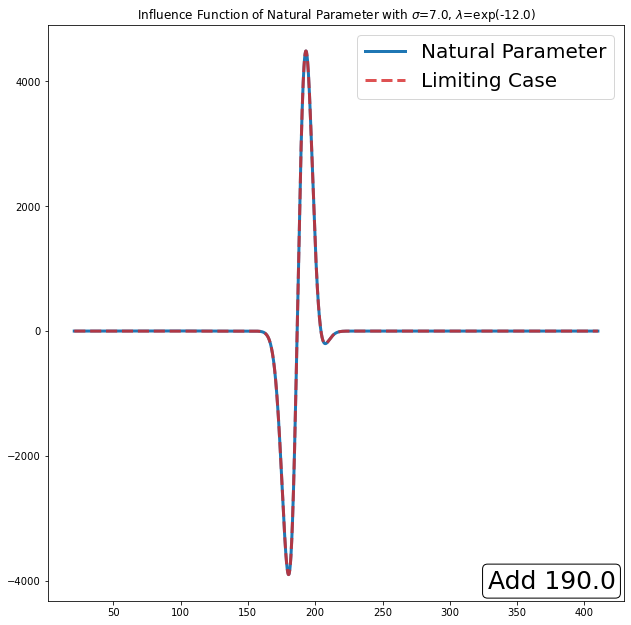

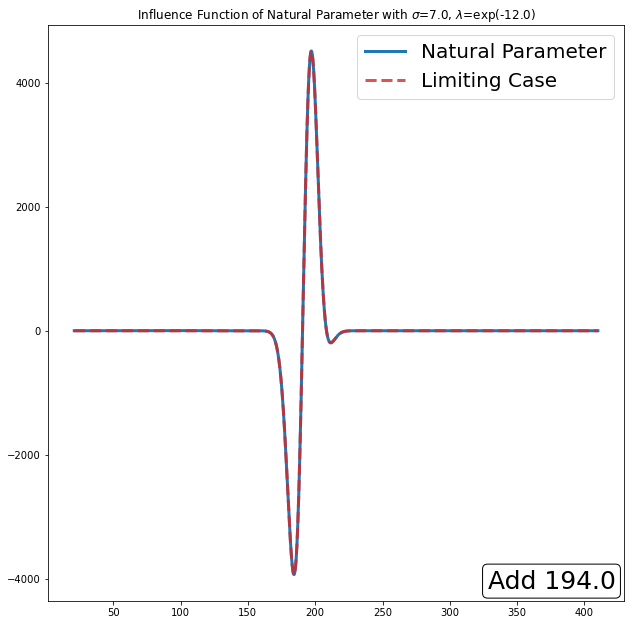

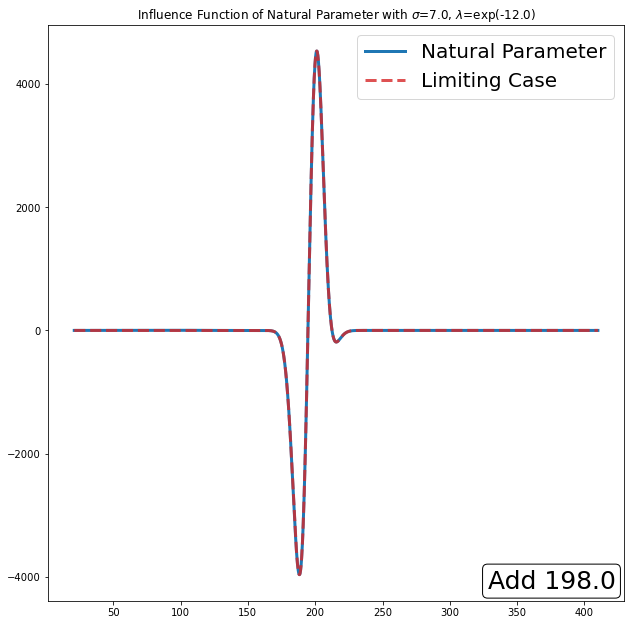

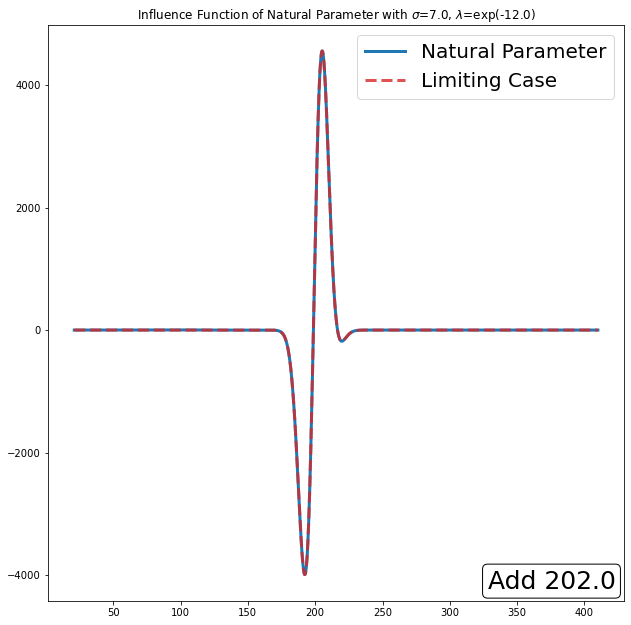

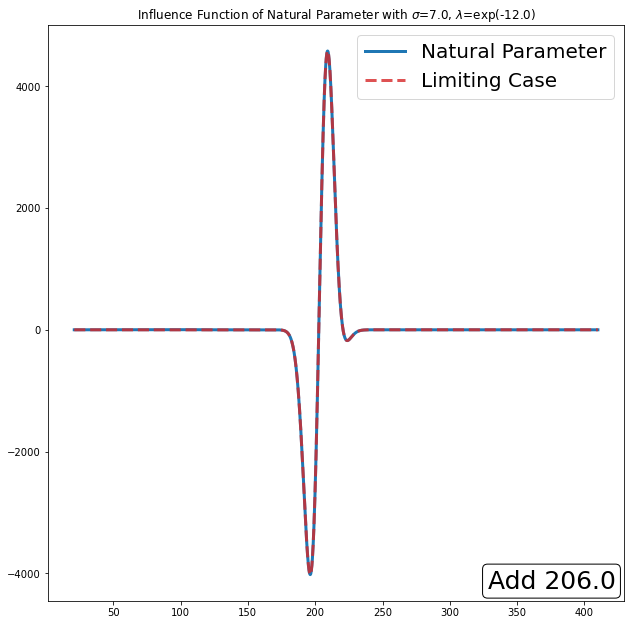

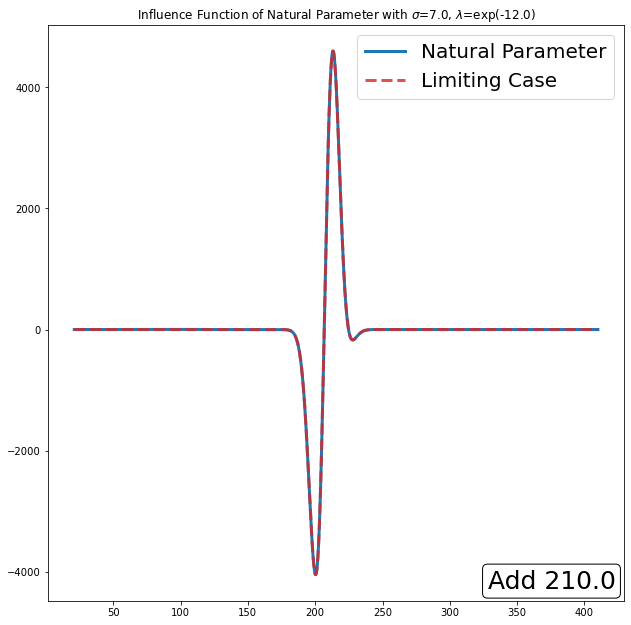

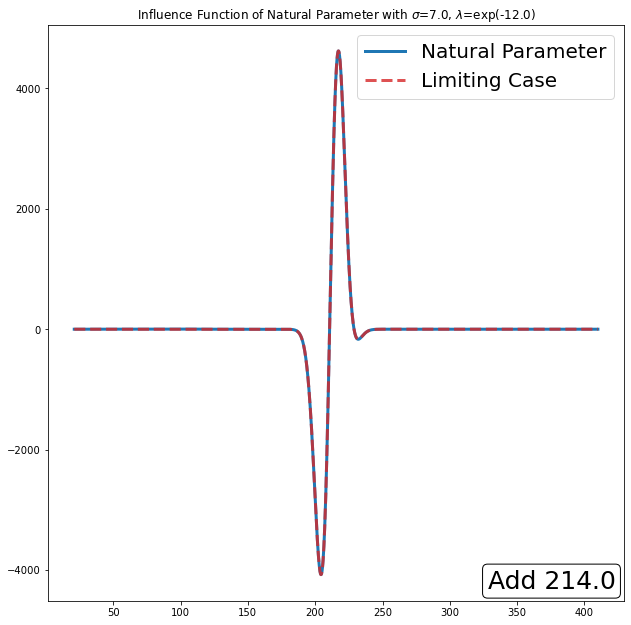

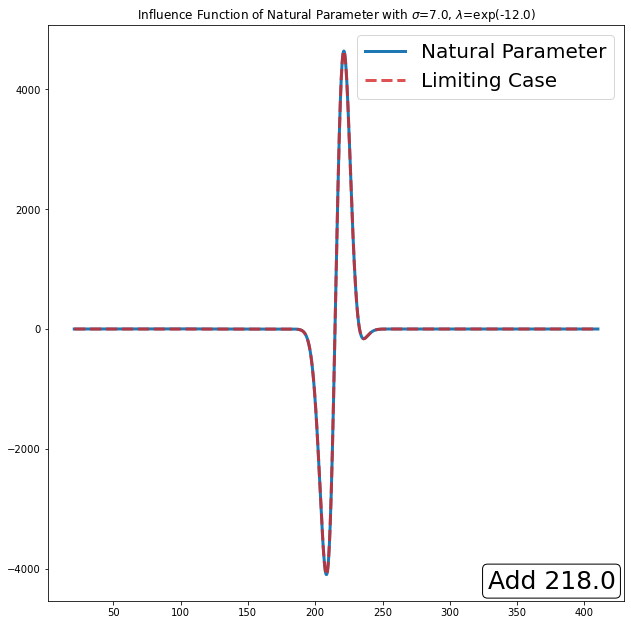

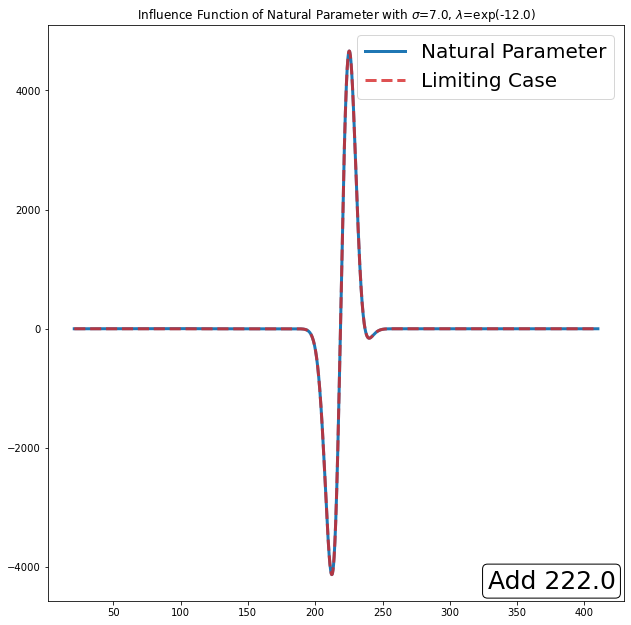

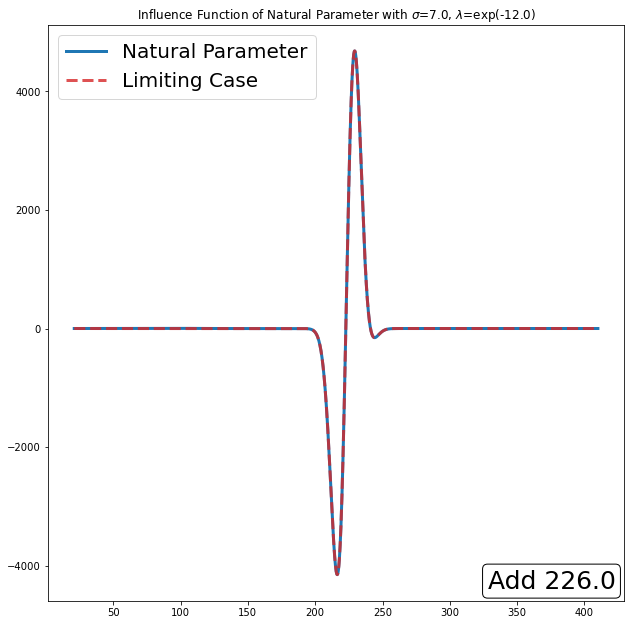

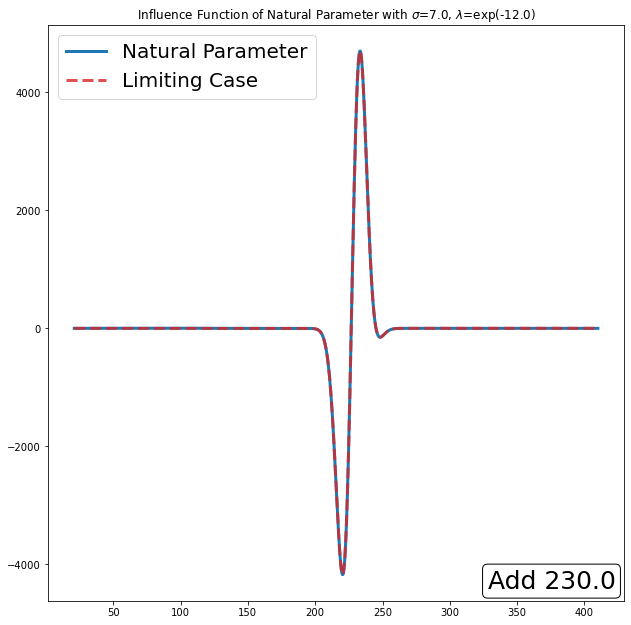

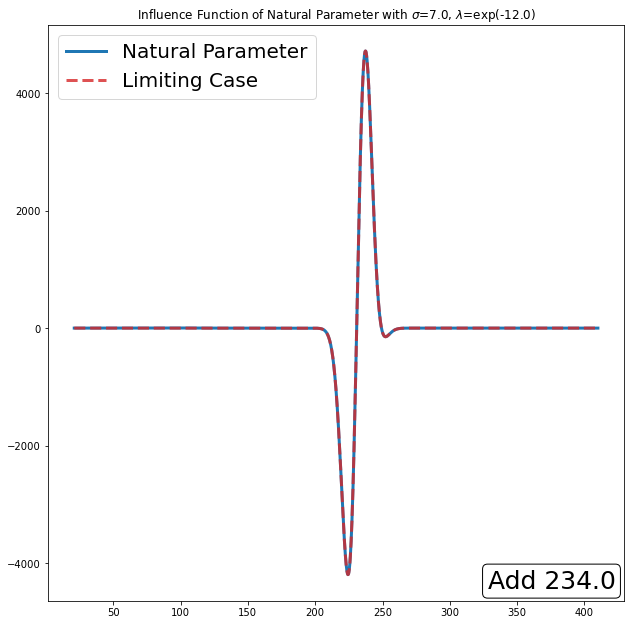

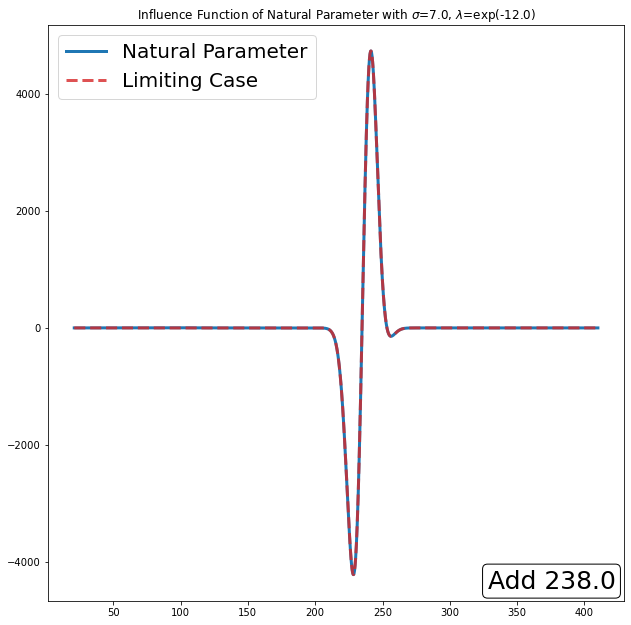

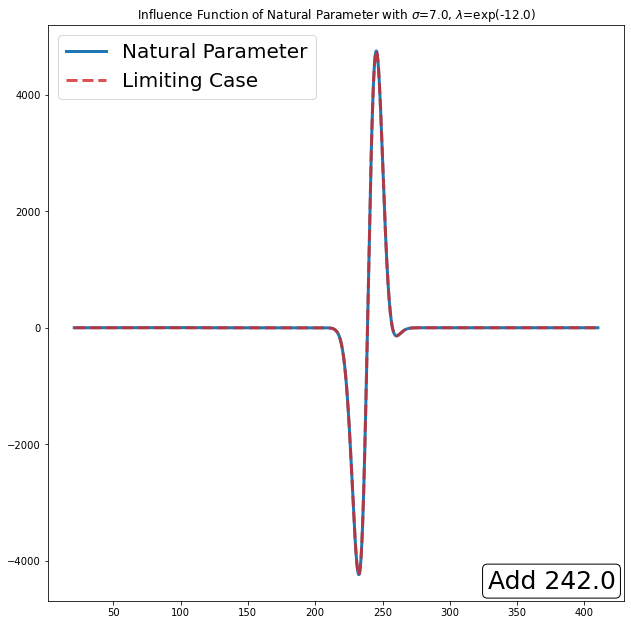

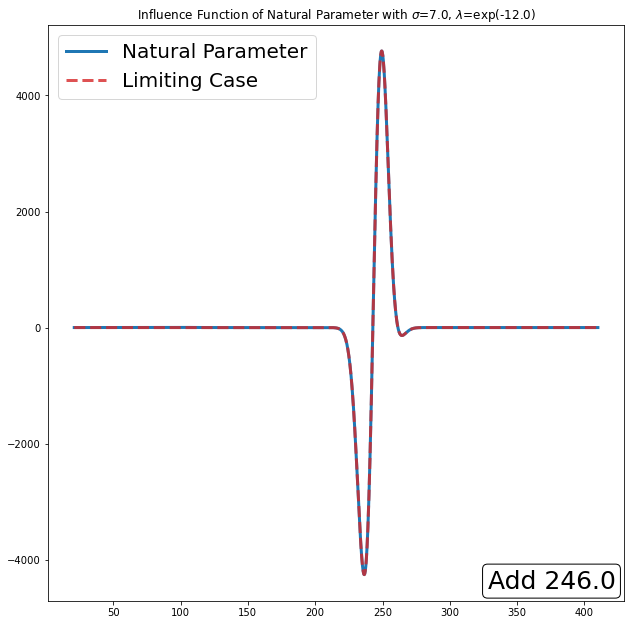

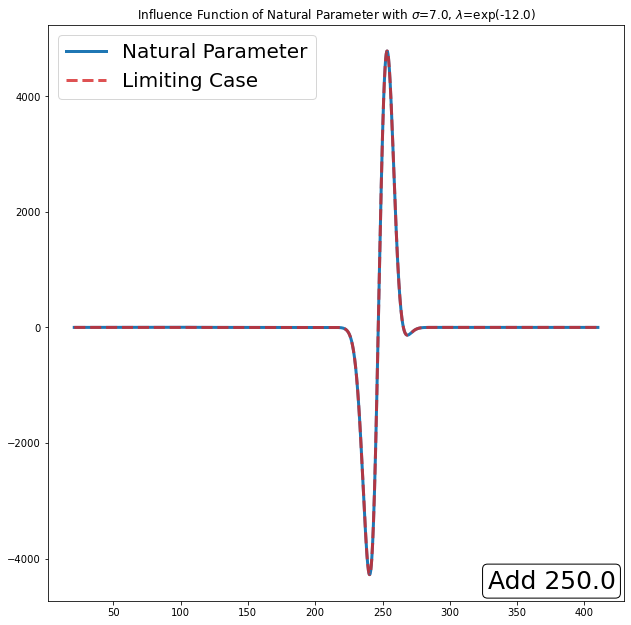

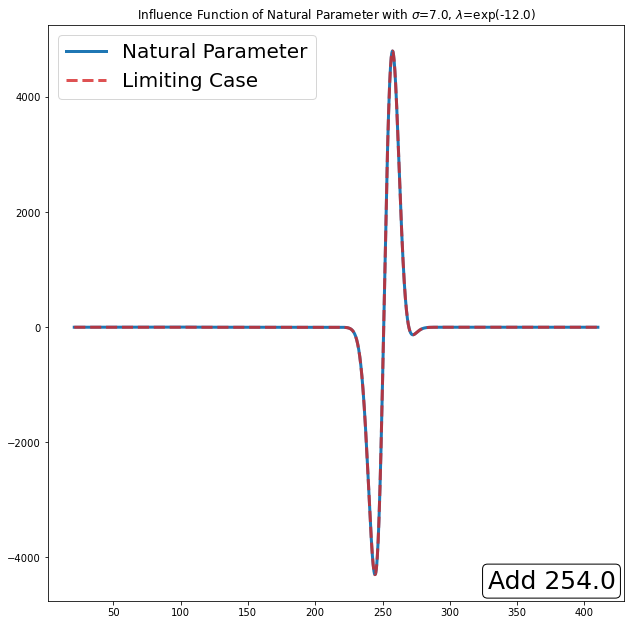

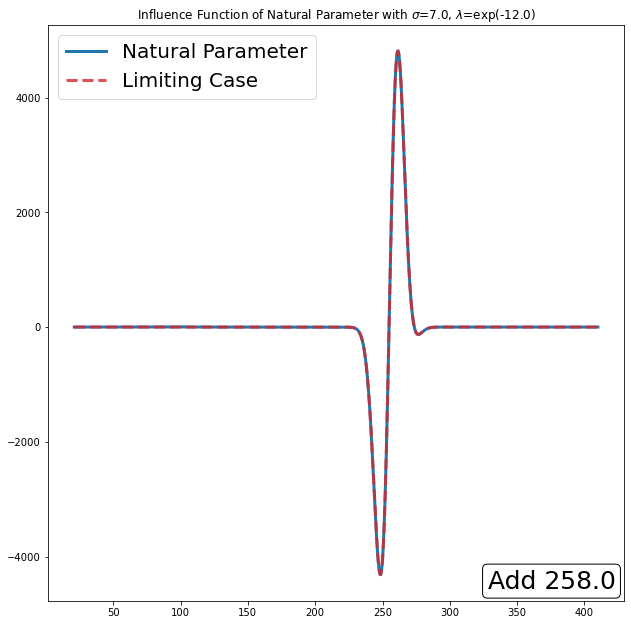

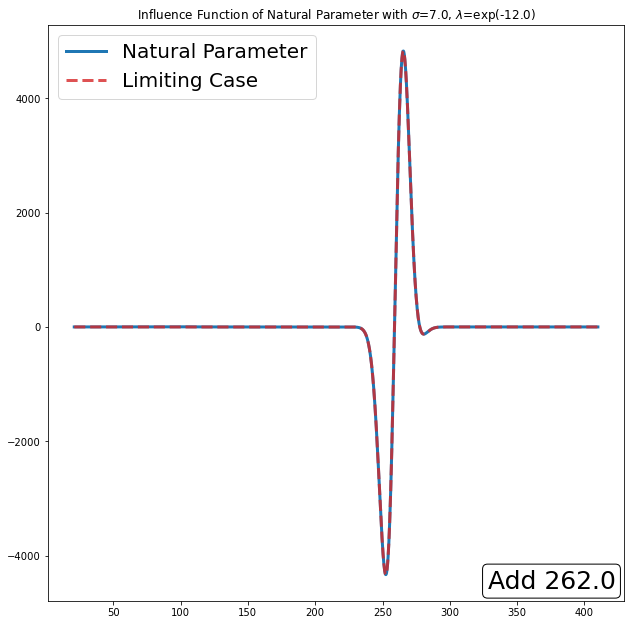

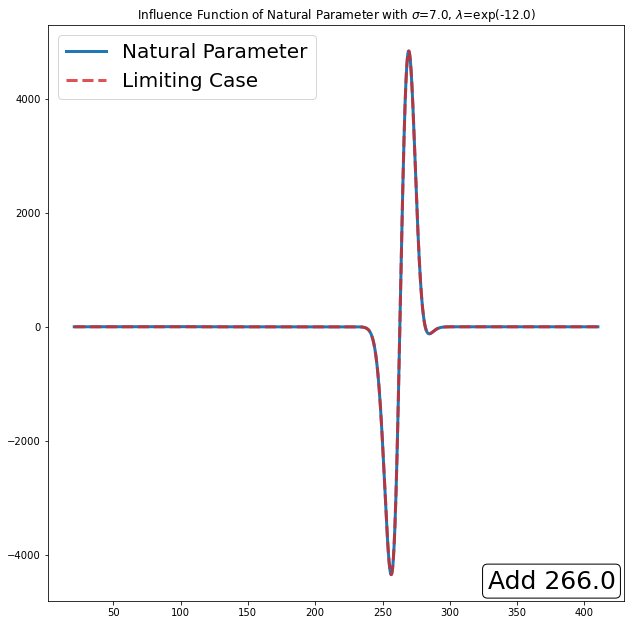

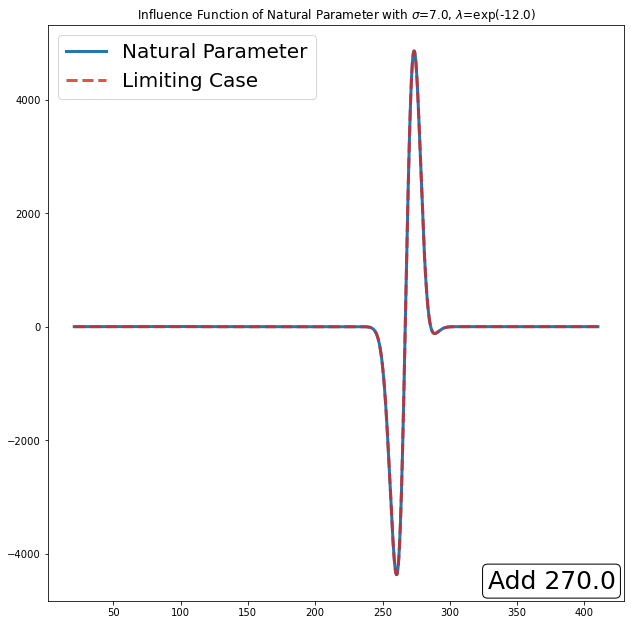

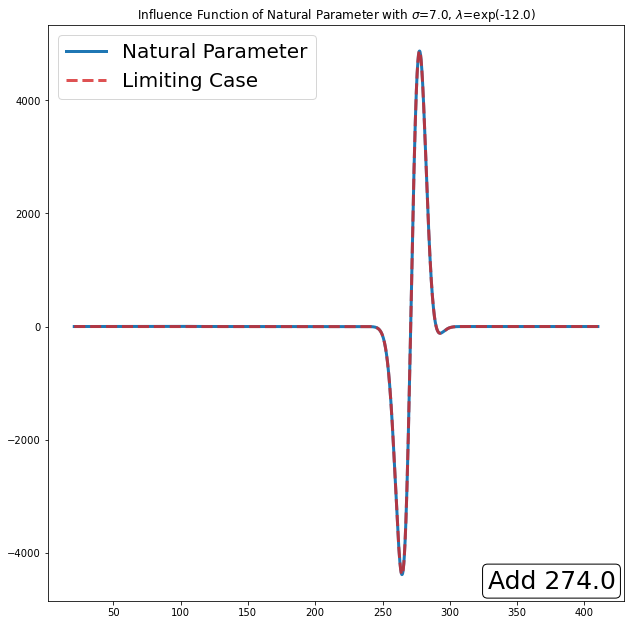

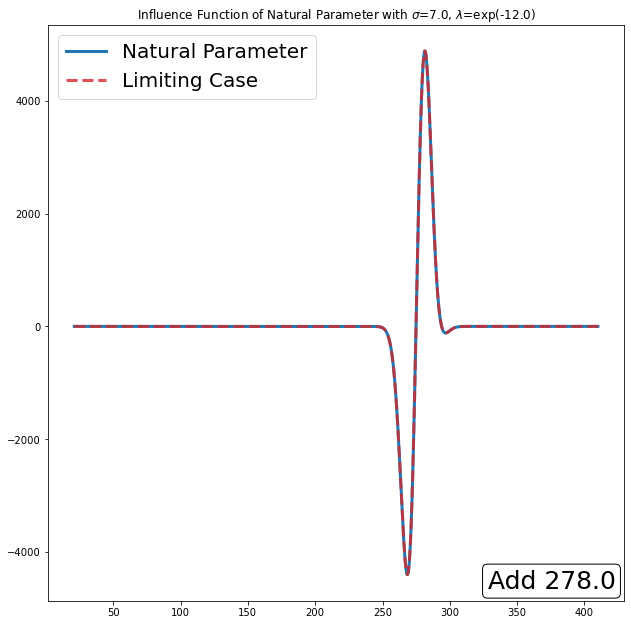

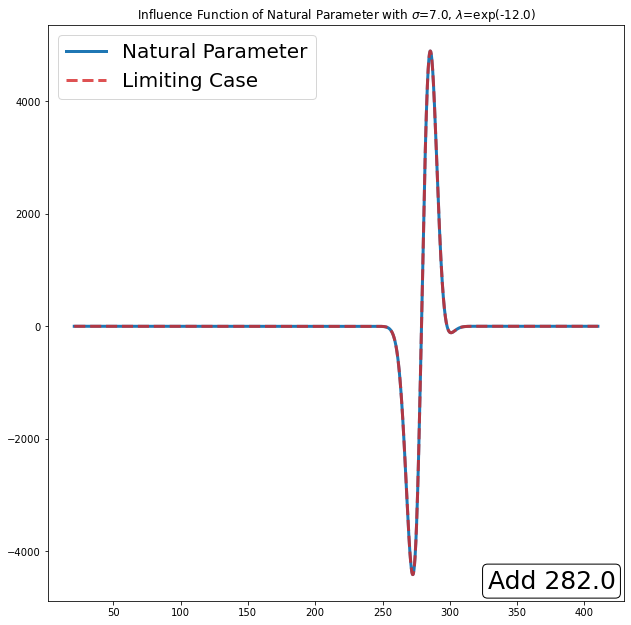

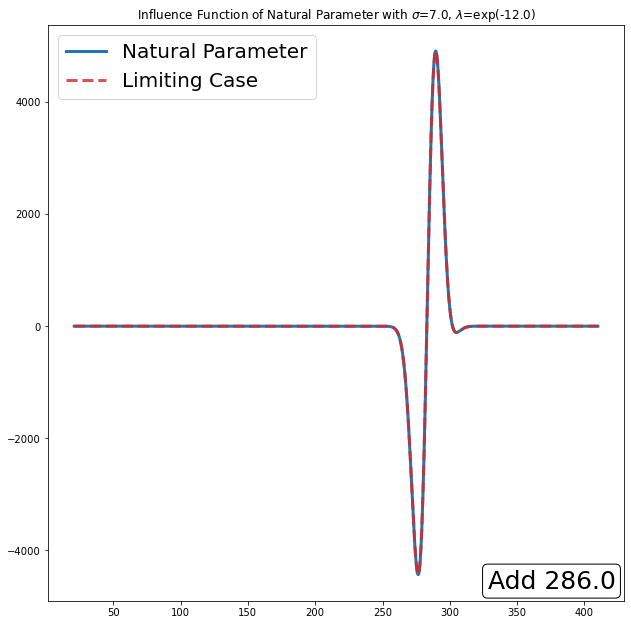

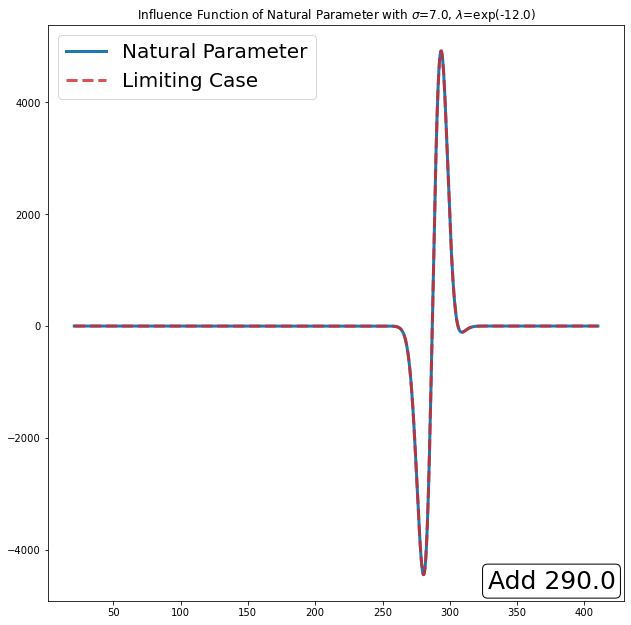

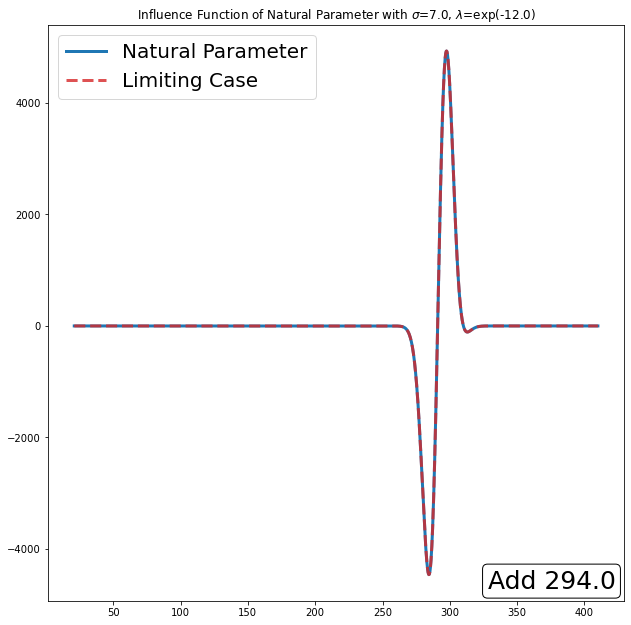

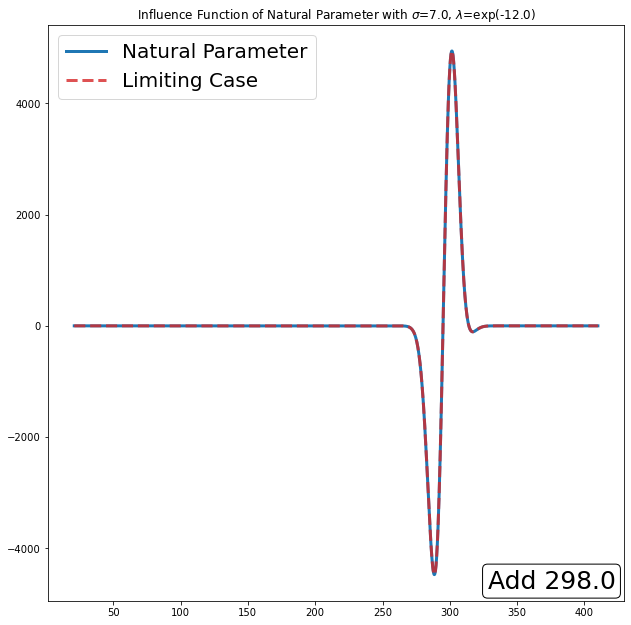

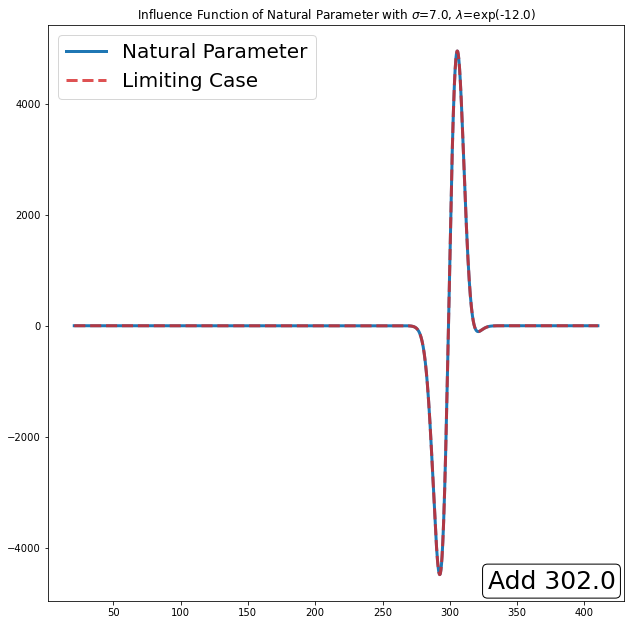

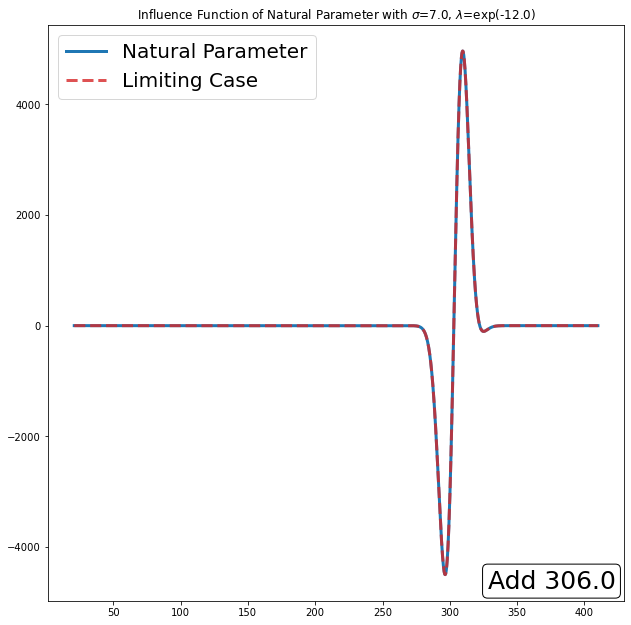

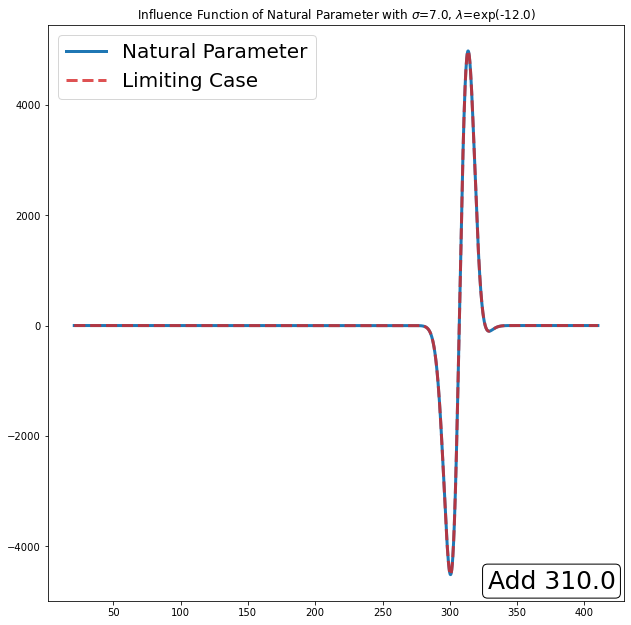

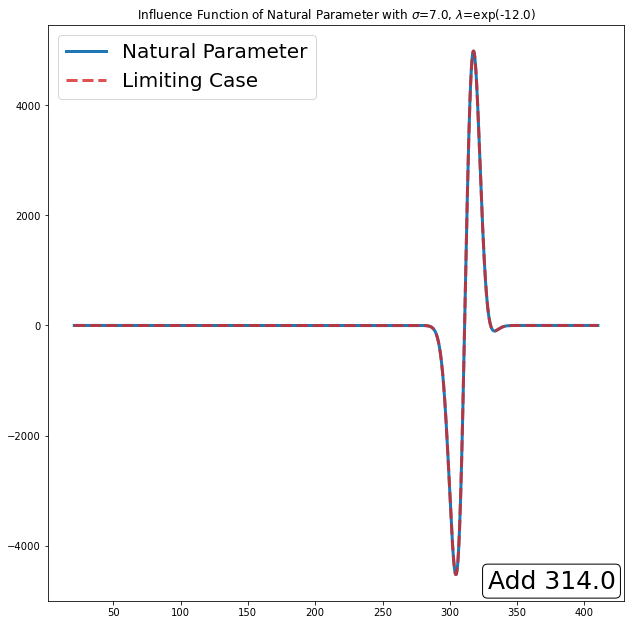

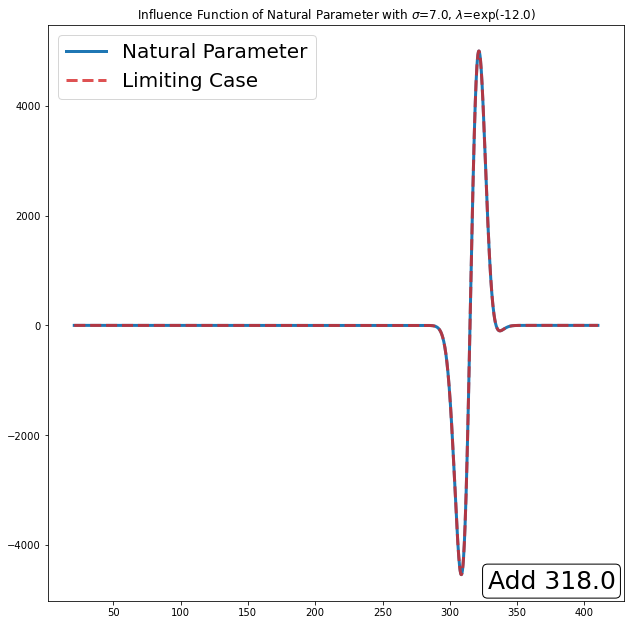

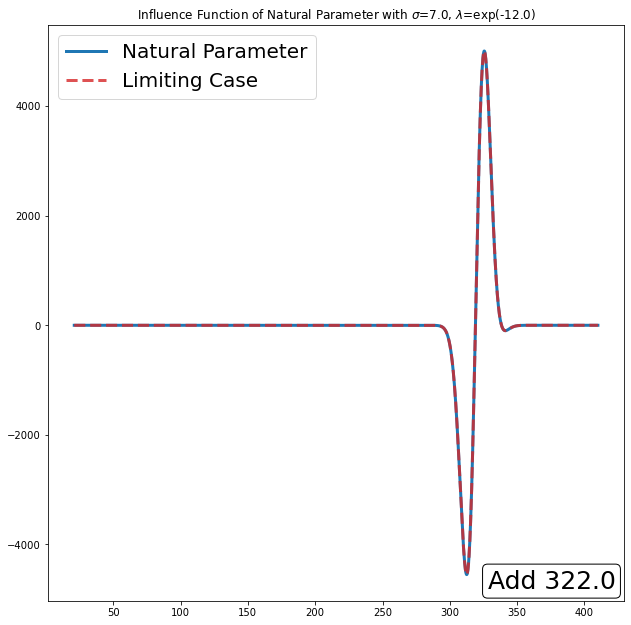

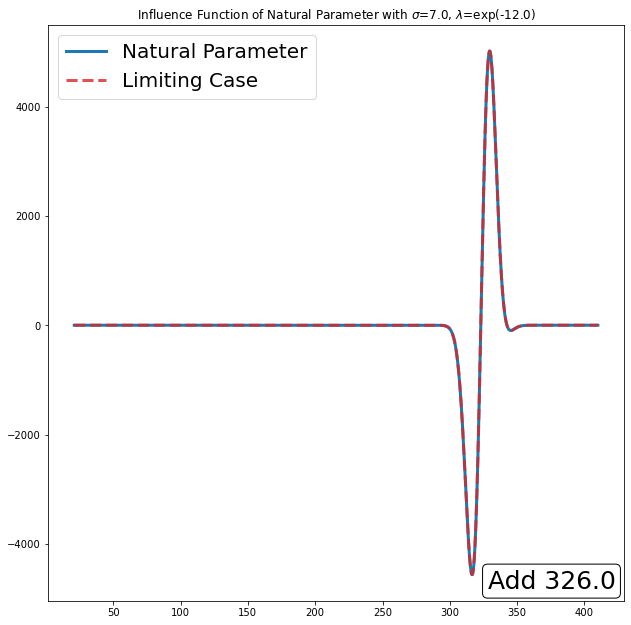

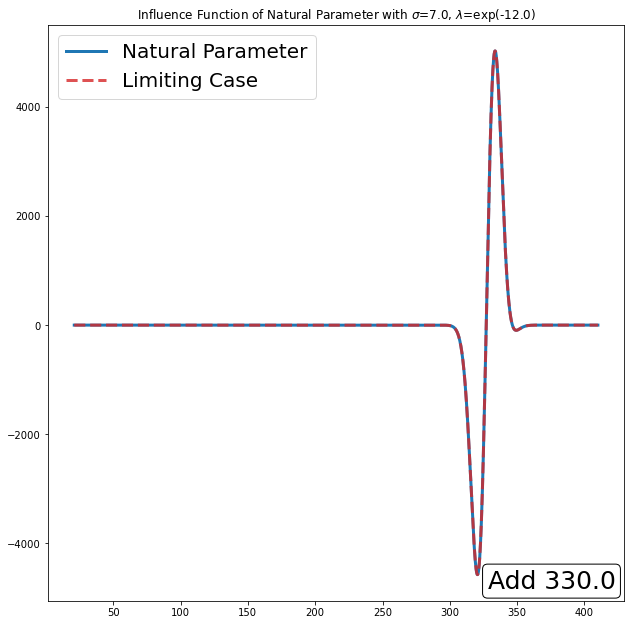

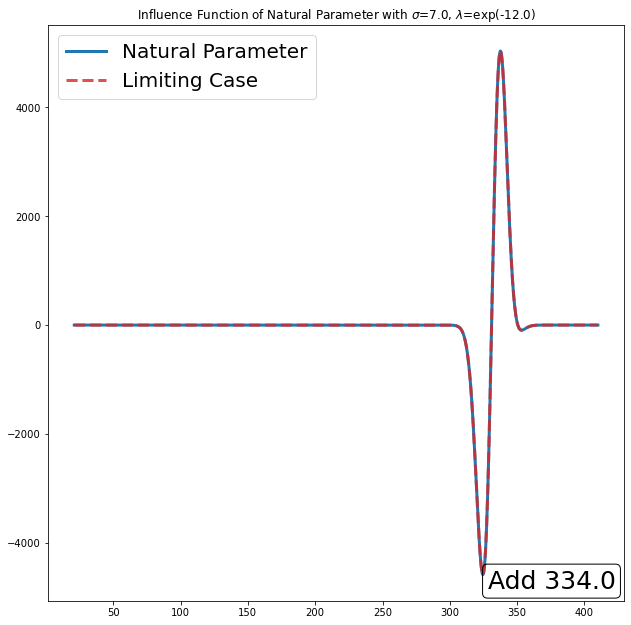

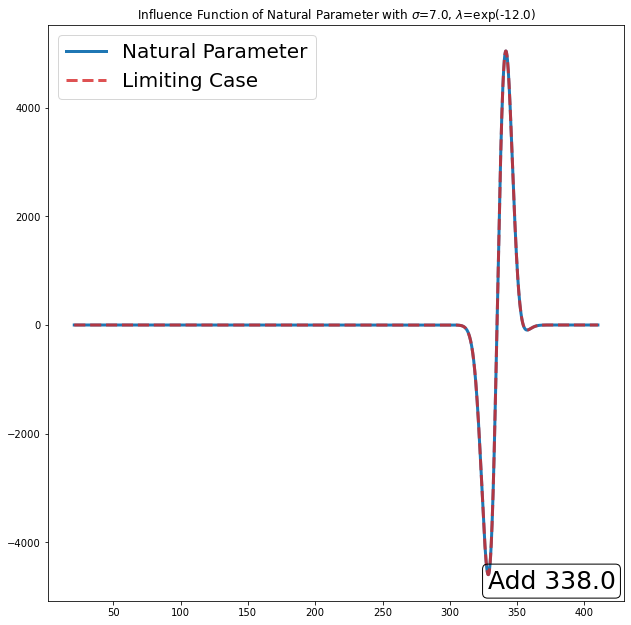

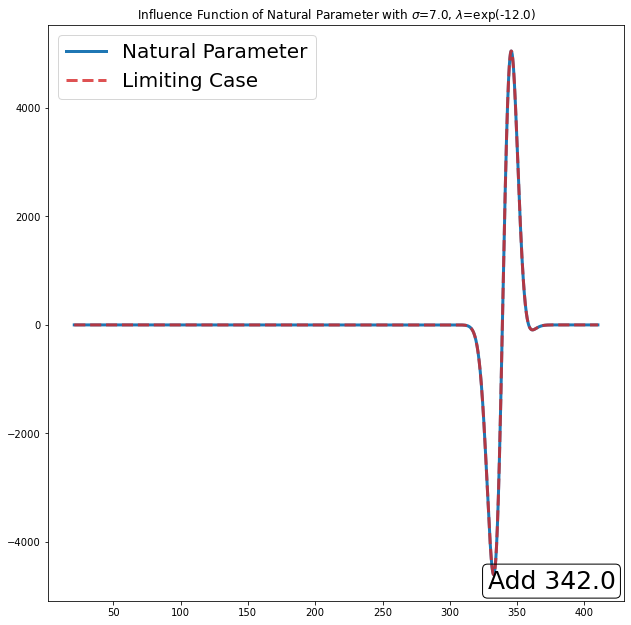

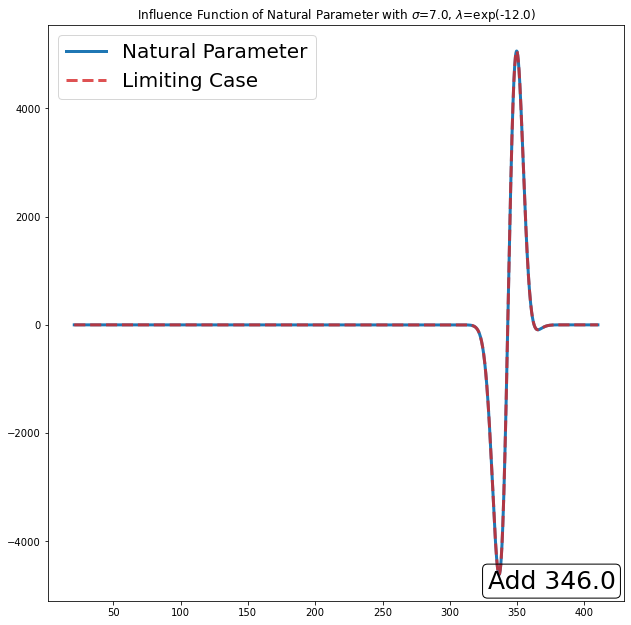

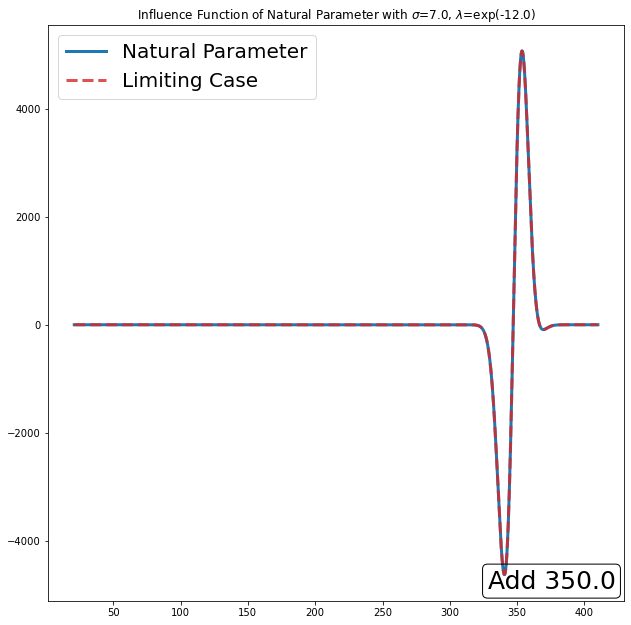

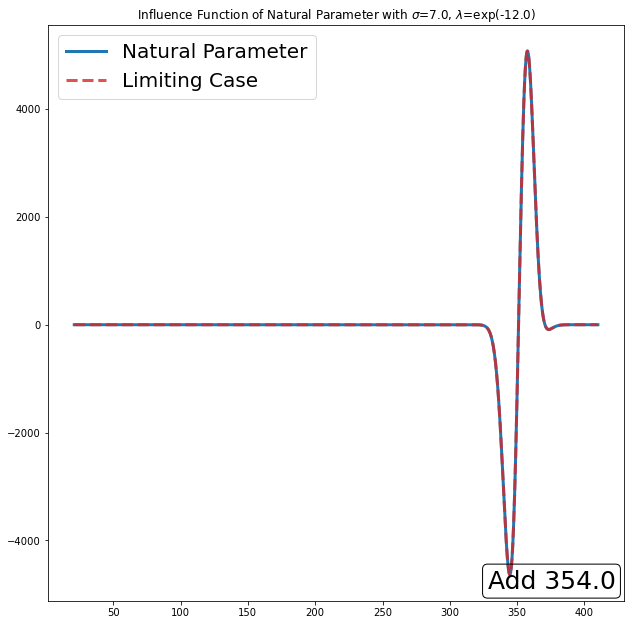

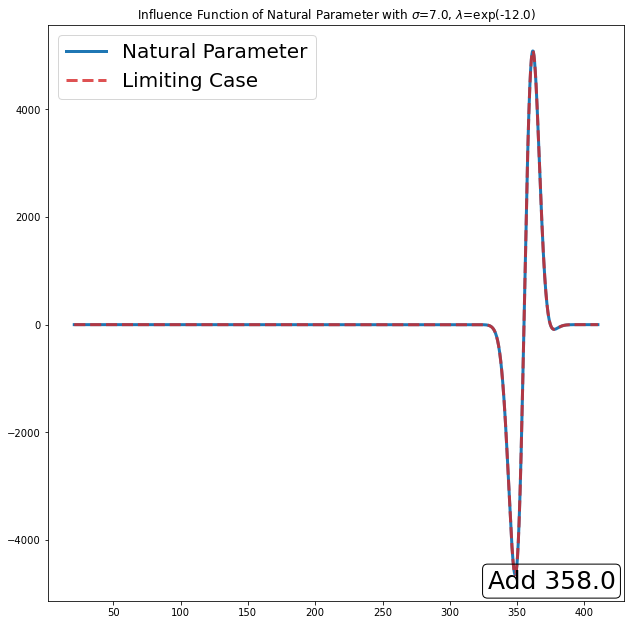

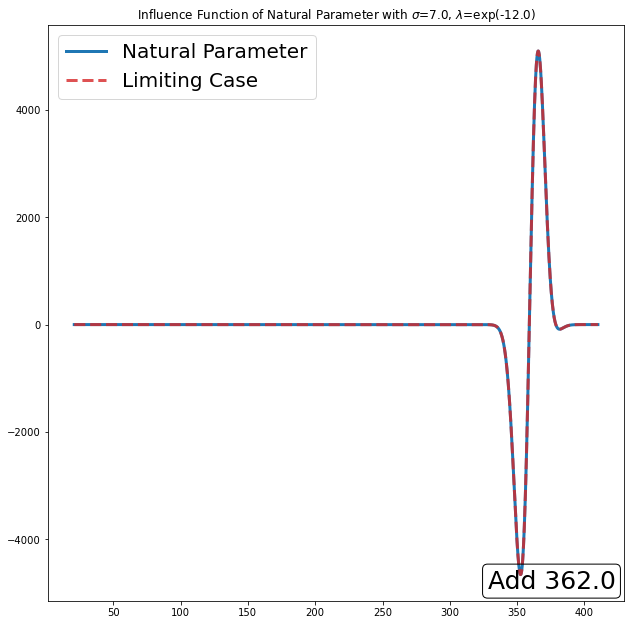

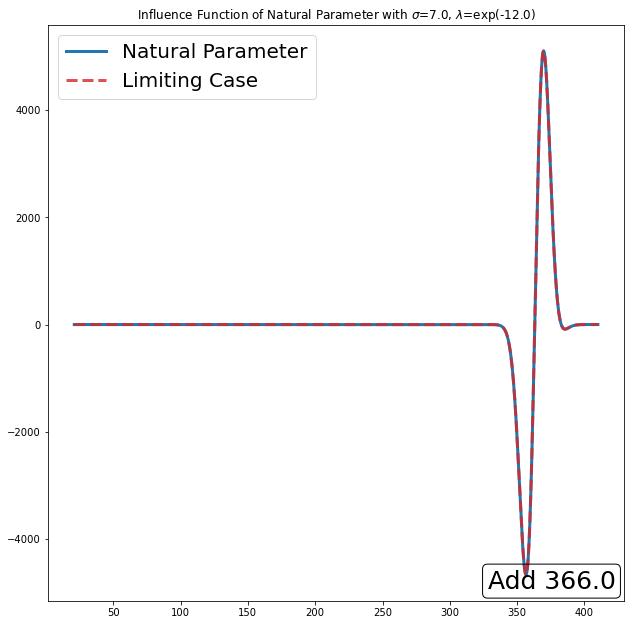

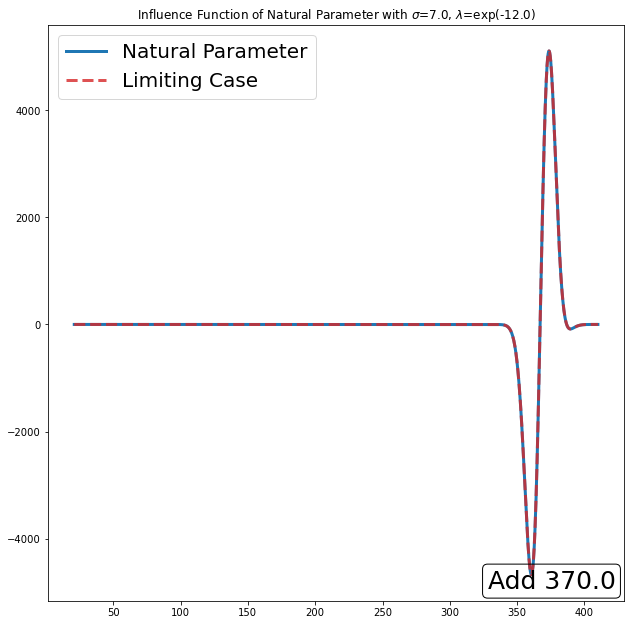

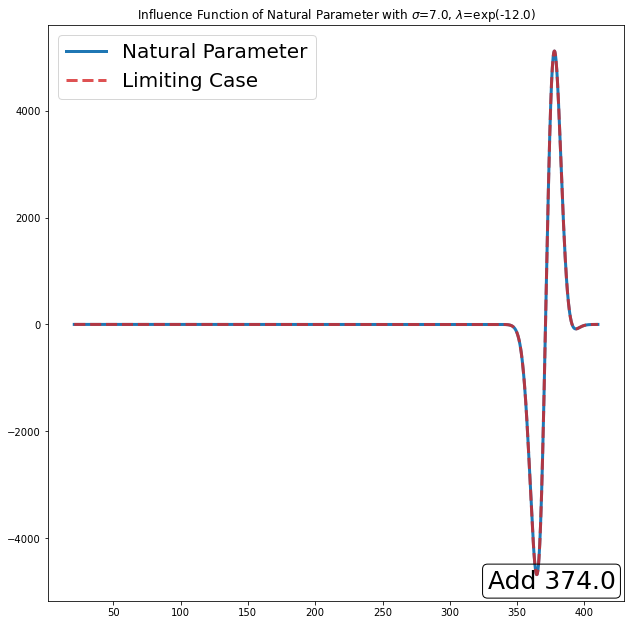

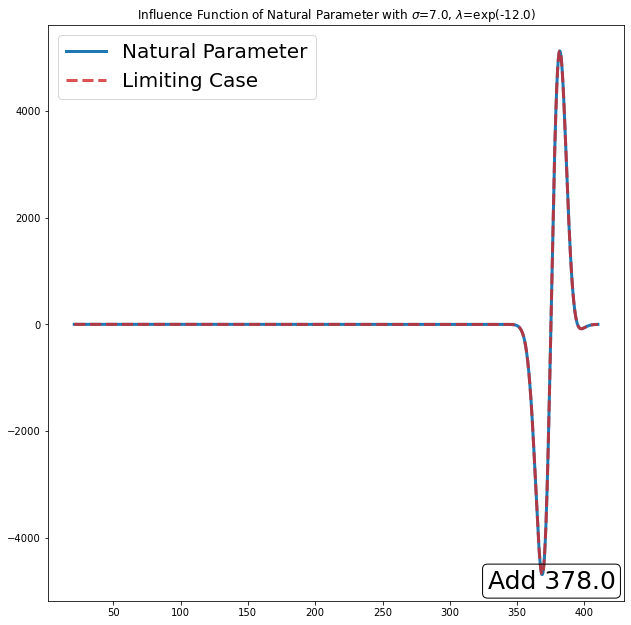

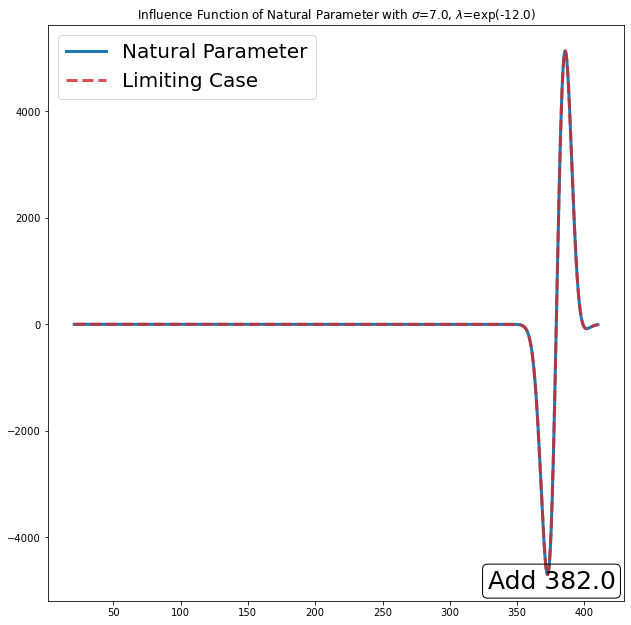

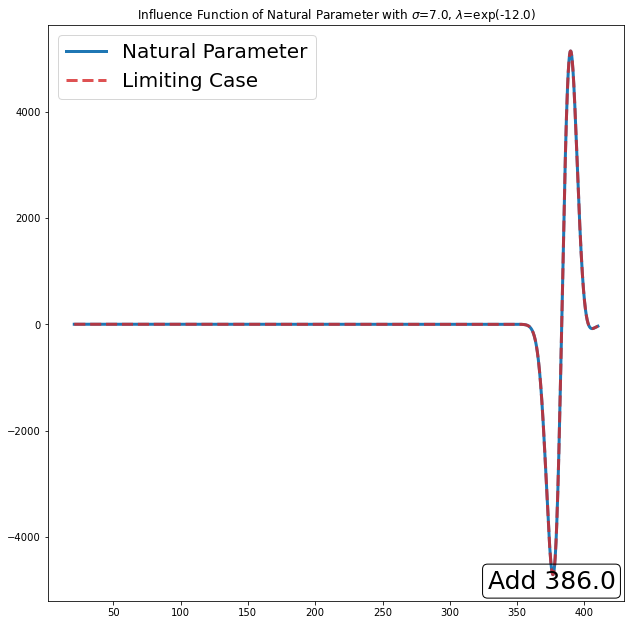

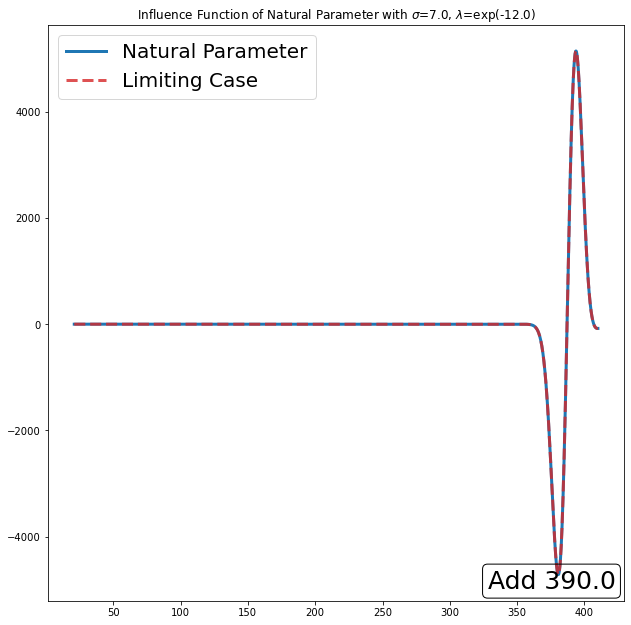

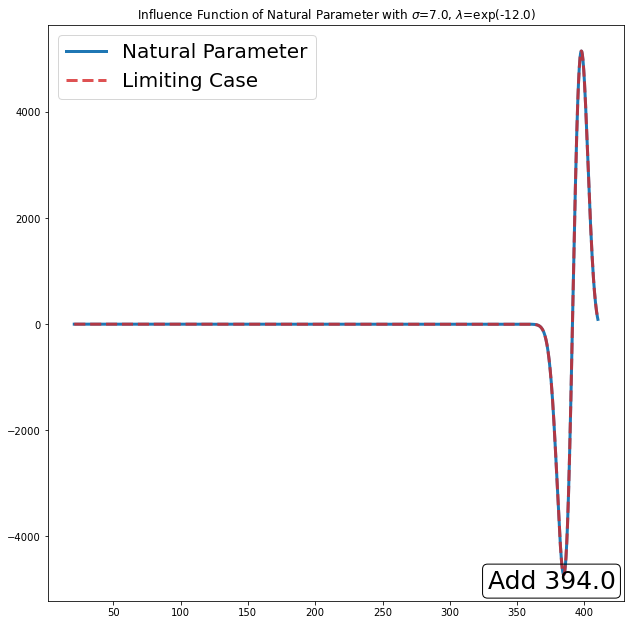

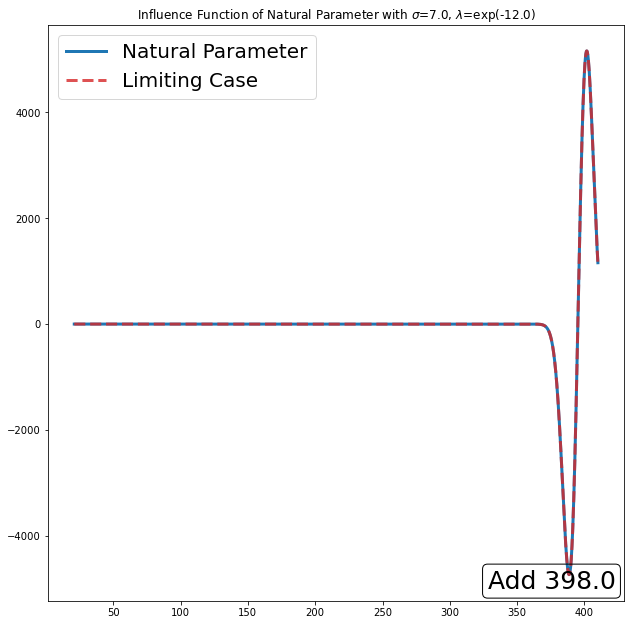

In [3]:
contam_data_array = np.sort(np.unique(np.concatenate((data_waiting.flatten(), np.arange(90., 401., 4))))).reshape(-1, 1)

# make plots 
for bw in bw_list: 
    for log_pen_param in log_pen_param_list: 
        print('=' * 100)
        print(f'bw={bw}, pen={log_pen_param}')
        save_dir=f'data/bw={bw}-kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}'
        
        # np.load(save_dir + f'/contam_data.npy').flatten()
        new_data = np.load(save_dir + f'/new_data.npy').flatten()

        linewidth = 2.0
        label_fontsize = 20
        info_fontsize = 25
        tick_fontsize = 15
        linewidth = 3.0
        x_label = 'waiting'
        y_label = 'IF'

        for i in range(len(contam_data_array)): 
            # read in data 
            result_natparam = np.load(
                save_dir + f'/contam_data={contam_data_array[i]}-IF-natparam-newdata.npy')
            result_natparam_lim = np.load(
                save_dir + f'/contam_data={contam_data_array[i]}-IF-natparam-limit-newdata.npy')

            fig = plt.figure(figsize=(10, 10))
            left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
            ax = fig.add_axes([left, bottom, width, height])
            
            plt.plot(new_data.flatten(), result_natparam, color = 'tab:blue', 
                     linestyle = 'solid', linewidth = linewidth, label = 'Natural Parameter')
            
            plt.plot(new_data.flatten(), result_natparam_lim, color = 'tab:red', 
                     linestyle = 'dashed', linewidth = linewidth, label = 'Limiting Case', alpha = 0.8)
            
            plt.title(r'Influence Function of Natural Parameter with $\sigma$={bw}, $\lambda$=exp({pen})'.format(
                bw = bw, pen = log_pen_param))
            plt.legend(fontsize = 20
                       # loc='upper center'
                      )
            
            # plt.ylim((-1500., 1500.))

        #     if i == nrows - 1: 
        #         ax.set_xlabel(x_label, fontsize = label_fontsize)
        #     else: 
        #         ax.set_xticks([])
        #     if j == 0: 
        #         ax.set_ylabel(y_label, fontsize = label_fontsize)

        #     ax.tick_params(axis = 'both', labelsize = tick_fontsize)

            info = r"Add {add_obs}".format(add_obs = contam_data_array[i][0])
            ax.text(0.985, 0.055,
                    info,
                    fontsize = info_fontsize,
                    multialignment = 'left',
                    horizontalalignment = 'right',
                    verticalalignment = 'top',
                    transform = ax.transAxes,
                    bbox = {'facecolor': 'none',
                            'boxstyle': 'Round, pad=0.2'})
            plt.show()

In [8]:
# make GIF
%matplotlib qt
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFdensity')

true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)
data_waiting = df[df != 108.0]

xlimit = (21., 410.)
plot_pts_cnt = 2000
new_data = np.linspace(xlimit[0], xlimit[1], plot_pts_cnt)

contam_data_array = np.sort(np.concatenate([np.arange(90., 401., 4.), np.unique(data_waiting)])).reshape(-1, 1)
contam_weight = 1e-8

kernel_type = 'gaussian_poly2'
bw = 7.0
log_pen_param = -12.0
ylimit = (-4900., 6300.)

var_name = 'waiting'

fontsize_label = 15
fontsize_tick = 10
fontsize_info = 16
fontsize_title = 20
fontsize_suptitle = 22
linewidth = 2.0

fig, ax = plt.subplots(
    nrows = 1, 
    ncols = 1, 
    figsize = (20, 10), 
    # tight_layout = True, 
    constrained_layout = False)

fig.subplots_adjust(top=0.9)

save_dir=f'data/bw={bw}-kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}'

def update_IF_plots(contam_data): 

    # read in the original data 
    true_data = np.load('data/geyser.npy').astype(np.float64)
    df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)
    df = df[df != 108.0]
    
    pddf = pd.DataFrame({'data': df.flatten()})
    
    ax.clear()
    
    # ---------------------------------------------------------------------------------------
    # set x-limit 
    ax.set_xlim(xlimit)
    # set x label 
    ax.set_xlabel(var_name, fontsize = fontsize_label)
    # set y label 
    ax.set_ylabel('IF', fontsize = fontsize_label)
    ax.set_ylim(ylimit)
    # formatting tick marks and tick labels 
    ax.tick_params(axis = 'both', labelsize = fontsize_tick)
    ax.ticklabel_format(axis = 'y')
    # add rug plot at normal observations 
    sns.rugplot(pd.Series(df.flatten()), ax = ax, color = 'tab:blue')
    sns.rugplot(pd.Series(contam_data), ax = ax, color = 'red')
    
    result_natparam = np.load(
        save_dir + f'/contam_data={contam_data}-IF-natparam-newdata.npy')
    result_natparam_lim = np.load(
        save_dir + f'/contam_data={contam_data}-IF-natparam-limit-newdata.npy')
            
    ax.plot(new_data.flatten(), result_natparam, color = 'tab:blue', 
            linestyle = 'solid', linewidth = linewidth, label = 'Natural Parameter')
    
    ax.plot(new_data.flatten(), result_natparam_lim, color = 'tab:red', 
            linestyle = 'dashed', linewidth = linewidth, label = 'Limiting Case', alpha = 0.8)
    
    plt.legend(fontsize = fontsize_info, loc = 'upper right'
              )
    
    # draw a vertical line at the outlier 
    ax.axvline(contam_data, 0, 1, ls = '--', color = 'tab:purple', alpha = 0.5)

    # add plot information 
    info = f'Add {contam_data[0]}'
    ax.text(0.007, 0.988,
            info,
             fontsize = fontsize_info,
             # fontfamily = 'serif',
             multialignment = 'left',
             horizontalalignment = 'left',
             verticalalignment = 'top',
             transform = ax.transAxes,
             bbox = {'facecolor': 'none',
                     'boxstyle': 'Round, pad=0.2'})
    
    return ax

ani = FuncAnimation(
    fig, 
    update_IF_plots, 
    frames = contam_data_array, 
    interval = 200)

fig.suptitle(r'Influence Function of Natural Parameter with $\sigma$={bw} and $\lambda$=exp({pen})'.format(
    bw=bw, pen=log_pen_param), 
             fontsize = fontsize_suptitle, y = 0.98)

# uncomment the following line to save the gif
ani.save(f'gif/IF-natparam-limit-waiting-kernel={kernel_type}-bw={bw}-pen=exp{log_pen_param}-contamweight={contam_weight}.gif', writer='imagemagick')

plt.show()